# Exploratory Data Analysis
### Author: Luci McDaniel
### GitHub Link: https://github.com/LuciMcD 

#### This notebook is to get initial information on the data collected before working on the goals of this project. This is an extension of the data cleaning as well. 

### 1. Concatenate the csv files.

In [2]:
import pandas as pd

file_list=['initial cleaned data/c2005.csv', 'initial cleaned data/c2006.csv', 'initial cleaned data/c2007.csv', 'initial cleaned data/c2008.csv', 'initial cleaned data/c2009.csv', 'initial cleaned data/c2010.csv', 'initial cleaned data/c2011.csv']

main_dataframe = pd.DataFrame(pd.read_csv(file_list[0]))

for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i])
    df = pd.DataFrame(data)
    main_dataframe = pd.concat([main_dataframe, df], axis=1)
print(main_dataframe)

    col1           state  vet_pop  overall_pop_18  vet_pop_p  vet_suicides  \
0      0         Alabama   403950         3344721       0.12           135   
1      1          Alaska    74482          446969       0.17            24   
2      2         Arizona   538880         4238996       0.13           225   
3      3        Arkansas   259304         2023819       0.13            81   
4      4      California  2193336        25543447       0.09           633   
5      5        Colorado   402091         3371999       0.12           191   
6      6     Connecticut   261294         2559377       0.10            52   
7      7        Delaware    79151          620779       0.13            17   
8      8        Florida*  1717801        13289030       0.13           540   
9      9         Georgia   731466         6437595       0.11           182   
10    10          Hawaii   116793          917646       0.13            15   
11    11           Idaho   132844         1019061       0.13    

### 2. Running initial summary statistics.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

main_dataframe.drop(columns=['col1'], inplace=True)
print(main_dataframe)

             state  vet_pop  overall_pop_18  vet_pop_p  vet_suicides  \
0          Alabama   403950         3344721       0.12           135   
1           Alaska    74482          446969       0.17            24   
2          Arizona   538880         4238996       0.13           225   
3         Arkansas   259304         2023819       0.13            81   
4       California  2193336        25543447       0.09           633   
5         Colorado   402091         3371999       0.12           191   
6      Connecticut   261294         2559377       0.10            52   
7         Delaware    79151          620779       0.13            17   
8         Florida*  1717801        13289030       0.13           540   
9          Georgia   731466         6437595       0.11           182   
10          Hawaii   116793          917646       0.13            15   
11           Idaho   132844         1019061       0.13            65   
12        Illinois   853338         9197524       0.09          

In [4]:
rounded = main_dataframe.describe()
rounded.round(2)

,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate,vet_pop,overall_pop_18,...,vet_rate,civ_rate,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,467912.50,4282440.50,0.12,136.92,652.08,0.21,30.26,15.46,467714.24,4483738.16,...,35.40,16.90,428574.16,4723109.82,0.10,146.92,764.86,0.19,35.69,16.70
std,448711.31,4698609.23,0.02,134.36,627.00,0.05,10.36,4.31,448543.57,4943646.65,...,11.10,4.31,405644.25,5228324.12,0.02,144.13,745.08,0.03,9.91,4.27
min,55519.00,379651.00,0.08,10.00,71.00,0.08,11.25,7.53,54263.00,390268.00,...,14.51,9.45,51373.00,430554.00,0.06,17.00,104.00,0.10,15.26,9.10
25%,147665.75,1300597.50,0.11,49.50,234.75,0.19,24.21,13.34,152576.50,1344364.00,...,27.85,14.46,146279.50,1400042.75,0.09,56.00,280.25,0.17,28.12,13.98
50%,346058.50,3075282.00,0.12,98.50,507.50,0.21,30.60,14.92,345780.00,3187939.50,...,35.42,16.04,319459.00,3386285.50,0.10,109.00,611.00,0.19,35.72,15.88
75%,544547.75,4702878.75,0.13,189.00,847.50,0.24,35.39,17.87,550949.50,4944188.75,...,40.42,19.53,522746.50,5190174.50,0.11,190.75,951.50,0.22,41.10,19.21
max,2193336.00,25543447.00,0.17,633.00,3206.00,0.29,58.63,28.73,2142367.00,26789221.00,...,71.31,29.58,1910994.00,28292703.00,0.14,706.00,3923.00,0.25,57.97,26.97


In [5]:
main_dataframe.nunique(axis=0)

state             50
vet_pop           50
overall_pop_18    50
vet_pop_p          9
vet_suicides      43
                  ..
vet_suicides      44
all_suicides      49
vet_suicides_p    14
vet_rate          49
civ_rate          47
Length: 63, dtype: int64

###  3.Finding Correlations

          vet_pop  overall_pop_18  vet_pop_p  vet_suicides  all_suicides  \
count       50.00           50.00      50.00         50.00         50.00   
mean    467912.50      4282440.50       0.12        136.92        652.08   
std     448711.31      4698609.23       0.02        134.36        627.00   
min      55519.00       379651.00       0.08         10.00         71.00   
25%     147665.75      1300597.50       0.11         49.50        234.75   
50%     346058.50      3075282.00       0.12         98.50        507.50   
75%     544547.75      4702878.75       0.13        189.00        847.50   
max    2193336.00     25543447.00       0.17        633.00       3206.00   

       vet_suicides_p  vet_rate  civ_rate  
count           50.00     50.00     50.00  
mean             0.21     30.26     15.46  
std              0.05     10.36      4.31  
min              0.08     11.25      7.53  
25%              0.19     24.21     13.34  
50%              0.21     30.60     14.92  
75%    

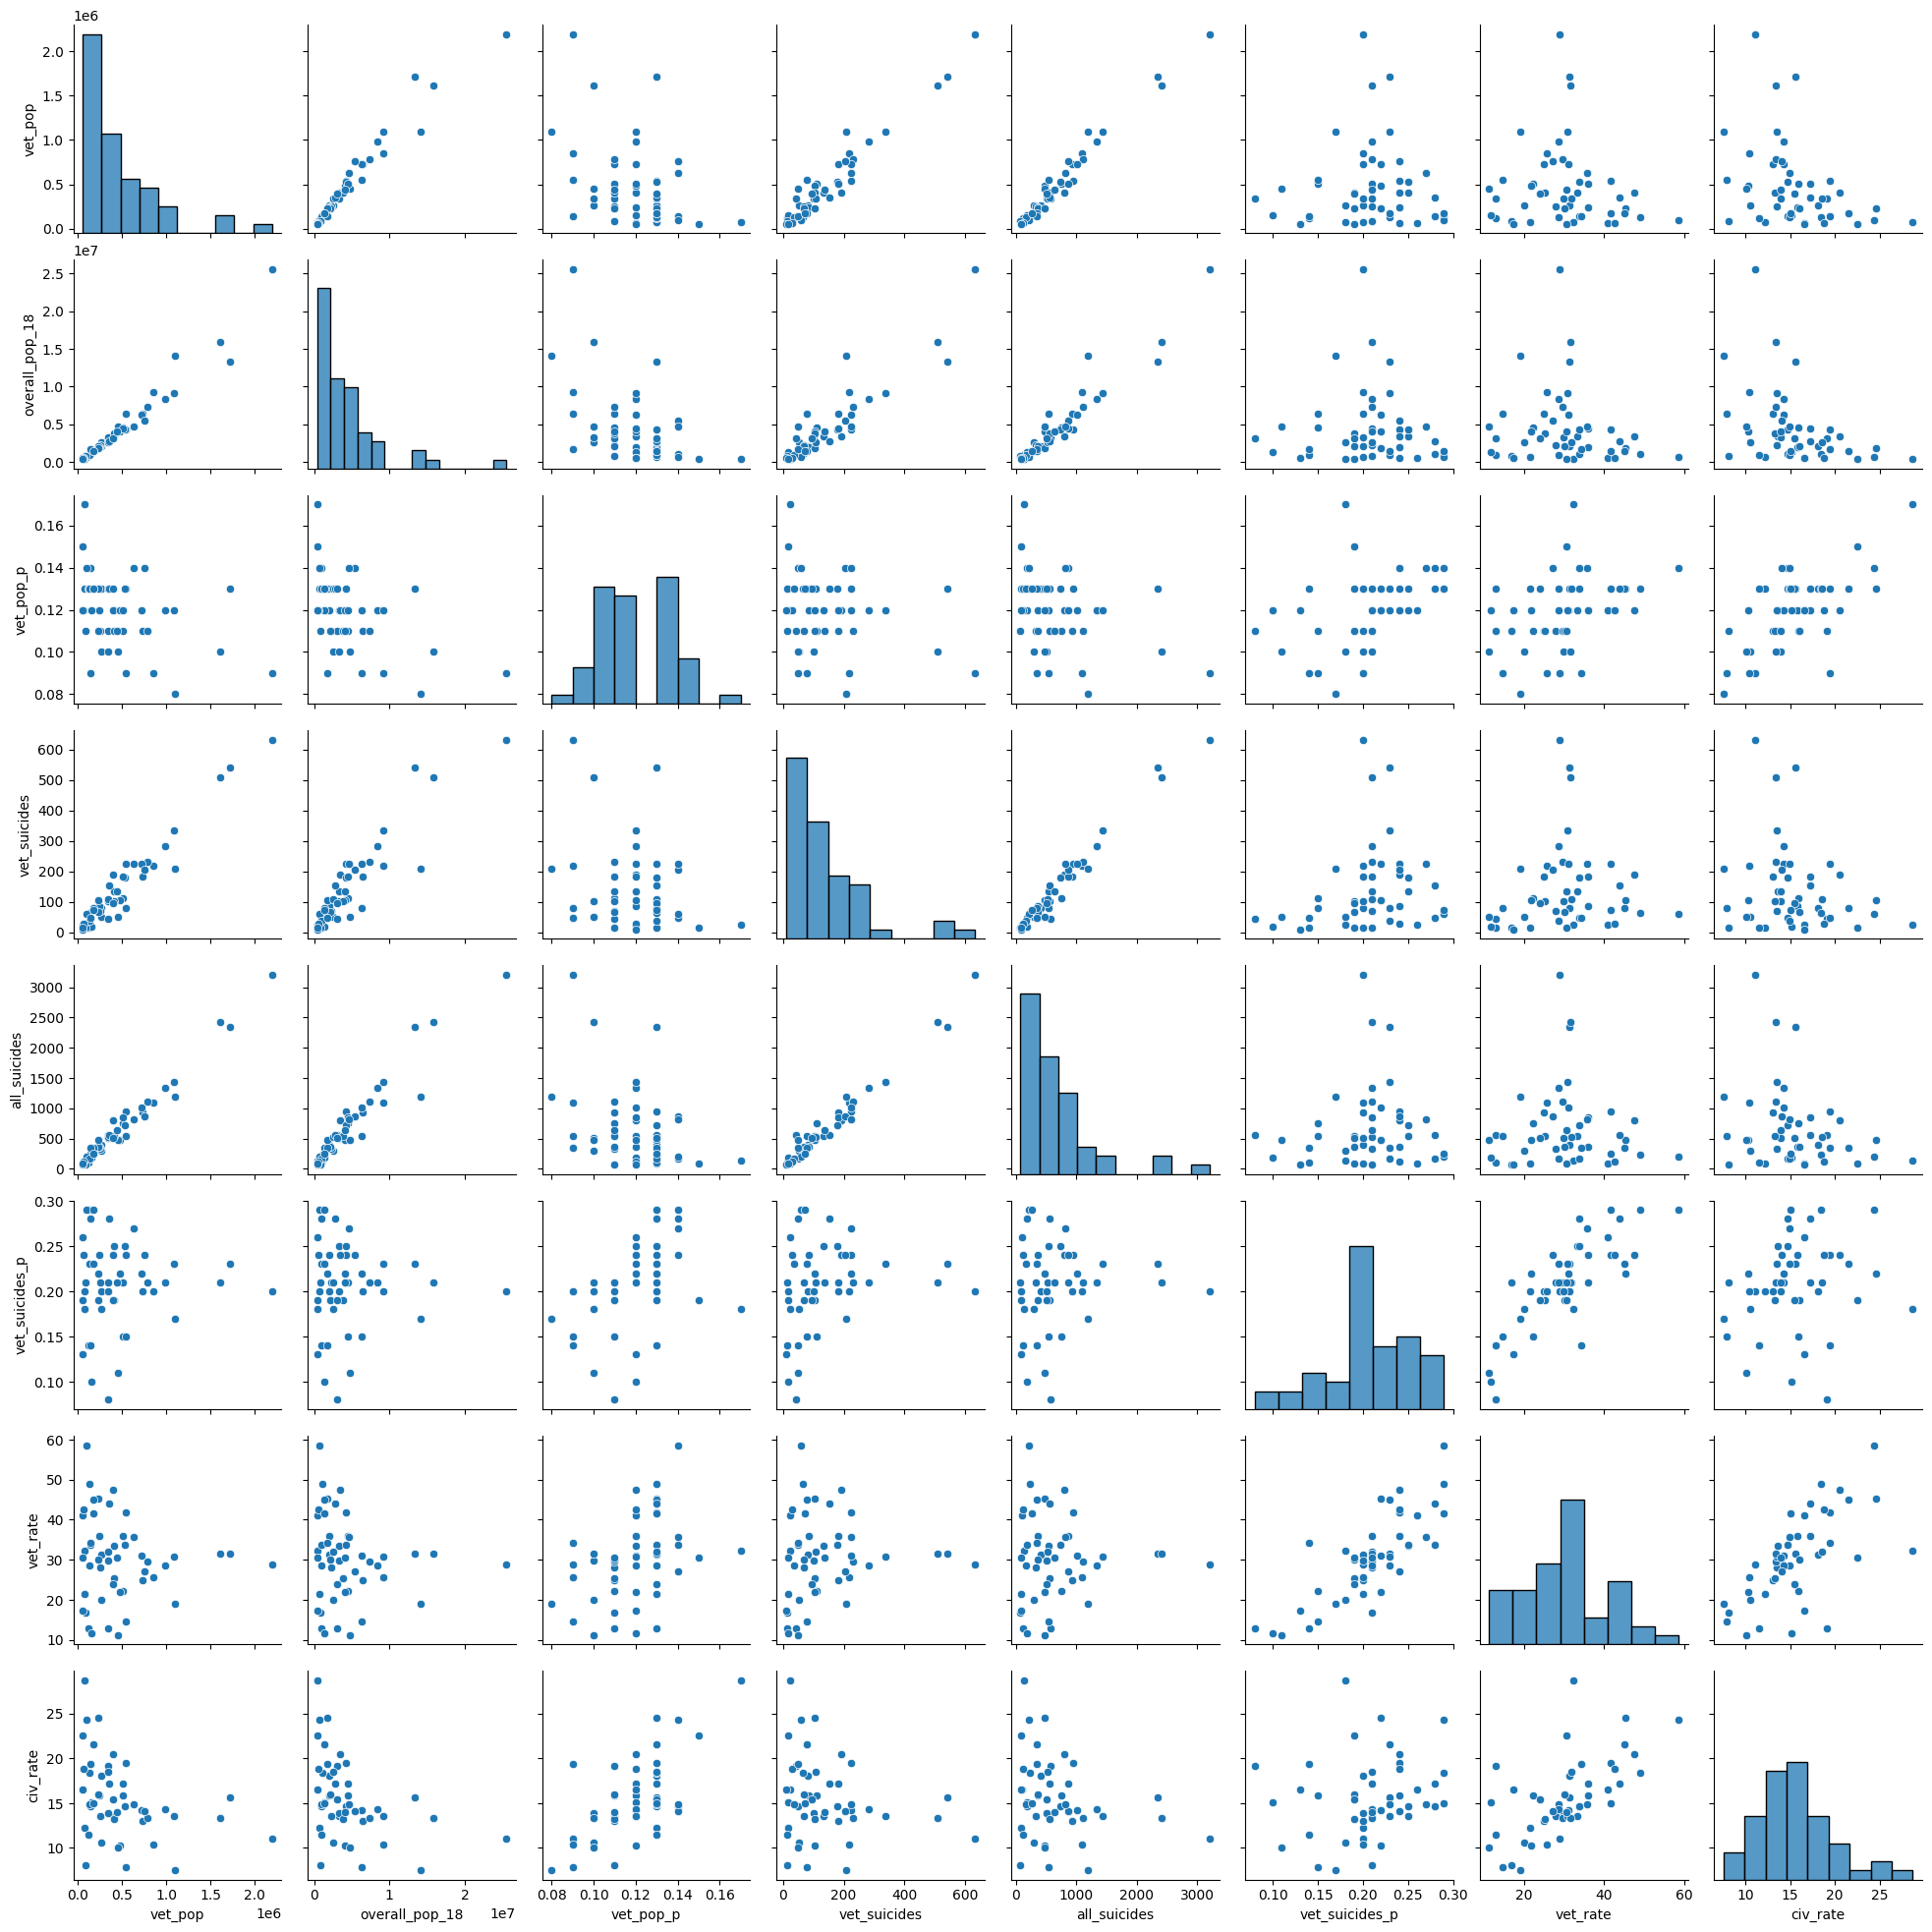

In [6]:
c2005 = pd.read_csv('initial cleaned data/c2005.csv')
c2005.drop(columns=['col1'], inplace=True)
describe5 = c2005.describe().round(2)
plot5 = sns.pairplot(c2005)
print(describe5,plot5 )

          vet_pop  overall_pop_18  vet_pop_p  vet_suicides  all_suicides  \
count       50.00           50.00      50.00         50.00         50.00   
mean    467714.24      4483738.16       0.11        130.02        665.40   
std     448543.57      4943646.65       0.02        133.61        640.72   
min      54263.00       390268.00       0.07          5.00         81.00   
25%     152576.50      1344364.00       0.10         43.25        233.75   
50%     345780.00      3187939.50       0.12         93.50        509.50   
75%     550949.50      4944188.75       0.12        171.00        861.50   
max    2142367.00     26789221.00       0.15        665.00       3334.00   

       vet_suicides_p  vet_rate  civ_rate  
count           50.00     50.00     50.00  
mean             0.20     29.05     15.34  
std              0.05      9.98      4.27  
min              0.02      3.29      8.06  
25%              0.18     23.52     12.87  
50%              0.20     30.05     14.44  
75%    

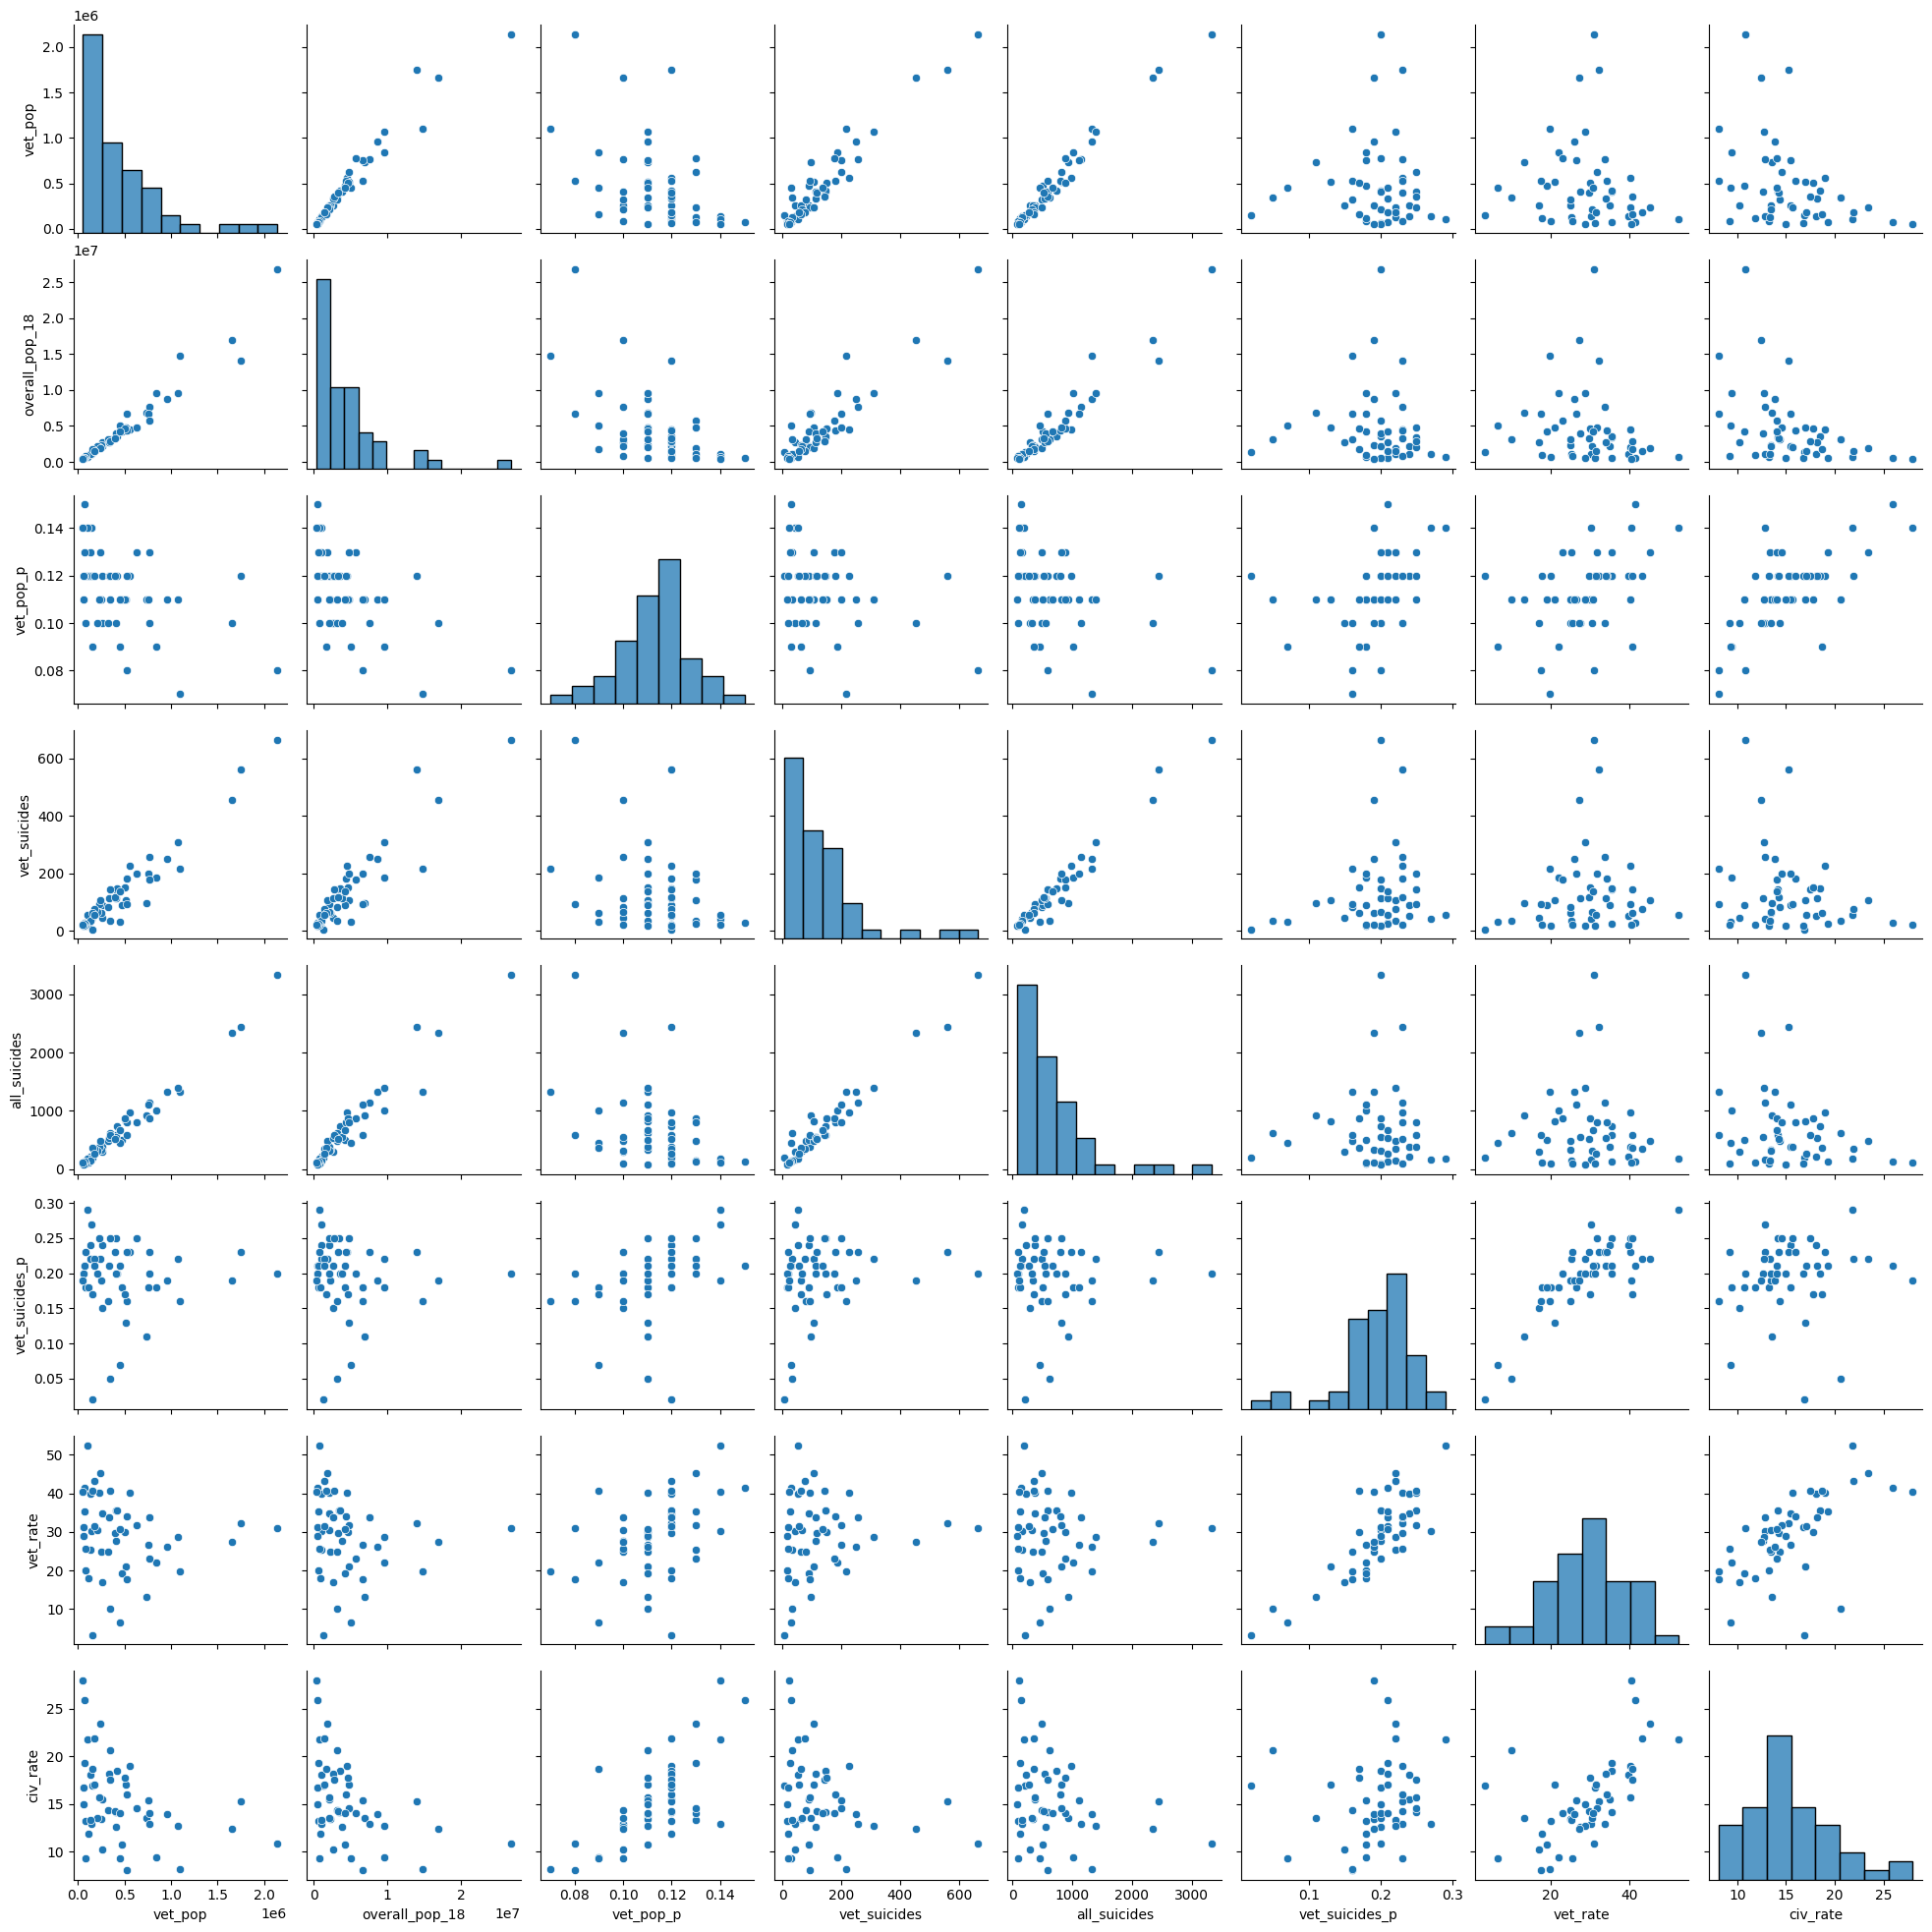

In [7]:
c2006 = pd.read_csv('initial cleaned data/c2006.csv')
c2006.drop(columns=['col1'], inplace=True)
describe6 = c2006.describe().round(2)
plot6 = sns.pairplot(c2006)
print(describe6, plot6)

          vet_pop  overall_pop_18  vet_pop_p  vet_suicides  all_suicides  \
count       50.00           50.00      50.00         50.00         50.00   
mean    457167.50      4524964.72       0.11        136.24        691.24   
std     435186.81      4988738.69       0.02        134.99        677.69   
min      51494.00       393326.00       0.07         15.00         89.00   
25%     150872.75      1345940.50       0.10         45.00        235.00   
50%     341757.50      3210196.50       0.11         93.50        526.00   
75%     544580.25      4981112.75       0.12        182.75        859.75   
max    2079606.00     27033547.00       0.15        655.00       3602.00   

       vet_suicides_p  vet_rate  civ_rate  
count           50.00     50.00     50.00  
mean             0.20     31.32     15.50  
std              0.05     10.83      4.01  
min              0.07     10.05      8.43  
25%              0.17     23.90     12.98  
50%              0.21     31.11     15.24  
75%    

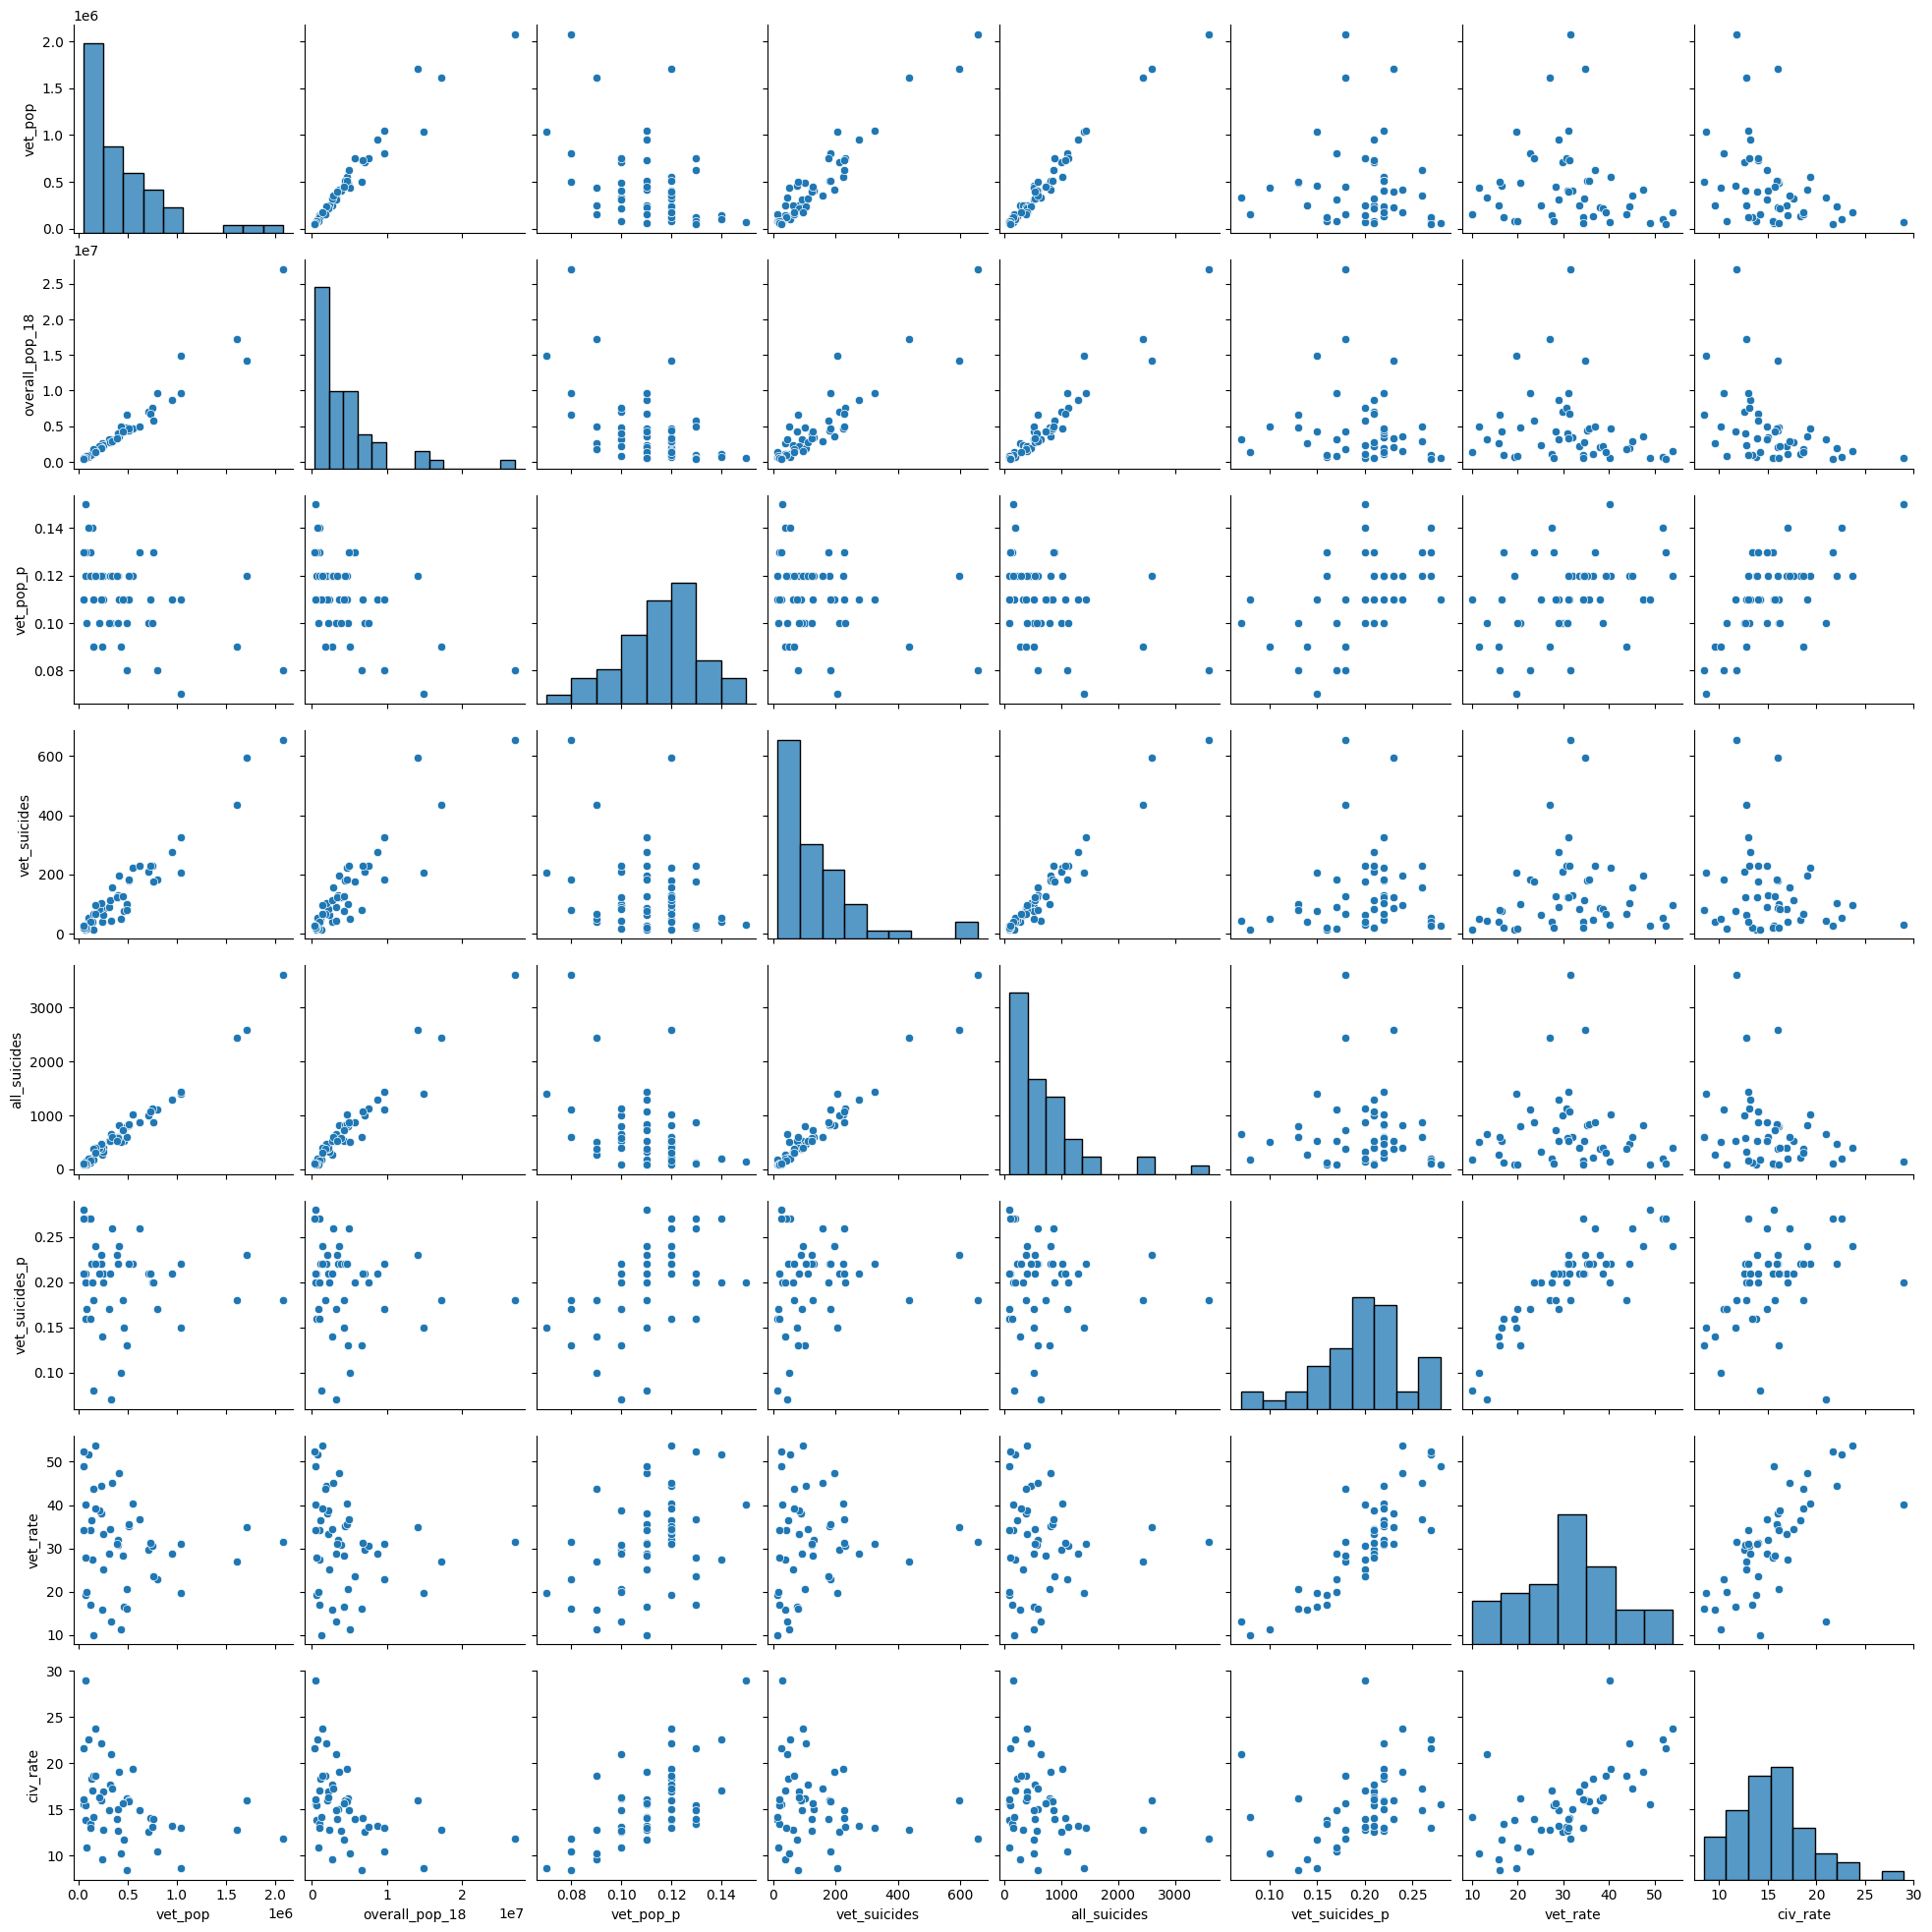

In [8]:
c2007 = pd.read_csv('initial cleaned data/c2007.csv')
c2007.drop(columns=['col1'], inplace=True)
describe7 = c2007.describe().round(2)
plot7 = sns.pairplot(c2007)
print(describe7, plot7)

          vet_pop  overall_pop_18  vet_pop_p  vet_suicides  all_suicides  \
count       50.00           50.00      50.00         50.00         50.00   
mean    447865.78      4568489.80       0.11        143.40        719.84   
std     426876.46      5036188.32       0.02        144.76        712.28   
min      50704.00       401718.00       0.07         14.00         86.00   
25%     146780.75      1354033.50       0.10         48.50        254.25   
50%     339390.50      3264878.50       0.11         96.50        548.50   
75%     540499.50      5032679.25       0.12        191.00        933.25   
max    2034700.00     27233110.00       0.14        727.00       3775.00   

       vet_suicides_p  vet_rate  civ_rate  
count           50.00     50.00     50.00  
mean             0.20     32.83     16.12  
std              0.04     10.61      4.62  
min              0.08     11.36      8.45  
25%              0.16     28.17     13.90  
50%              0.20     31.90     15.04  
75%    

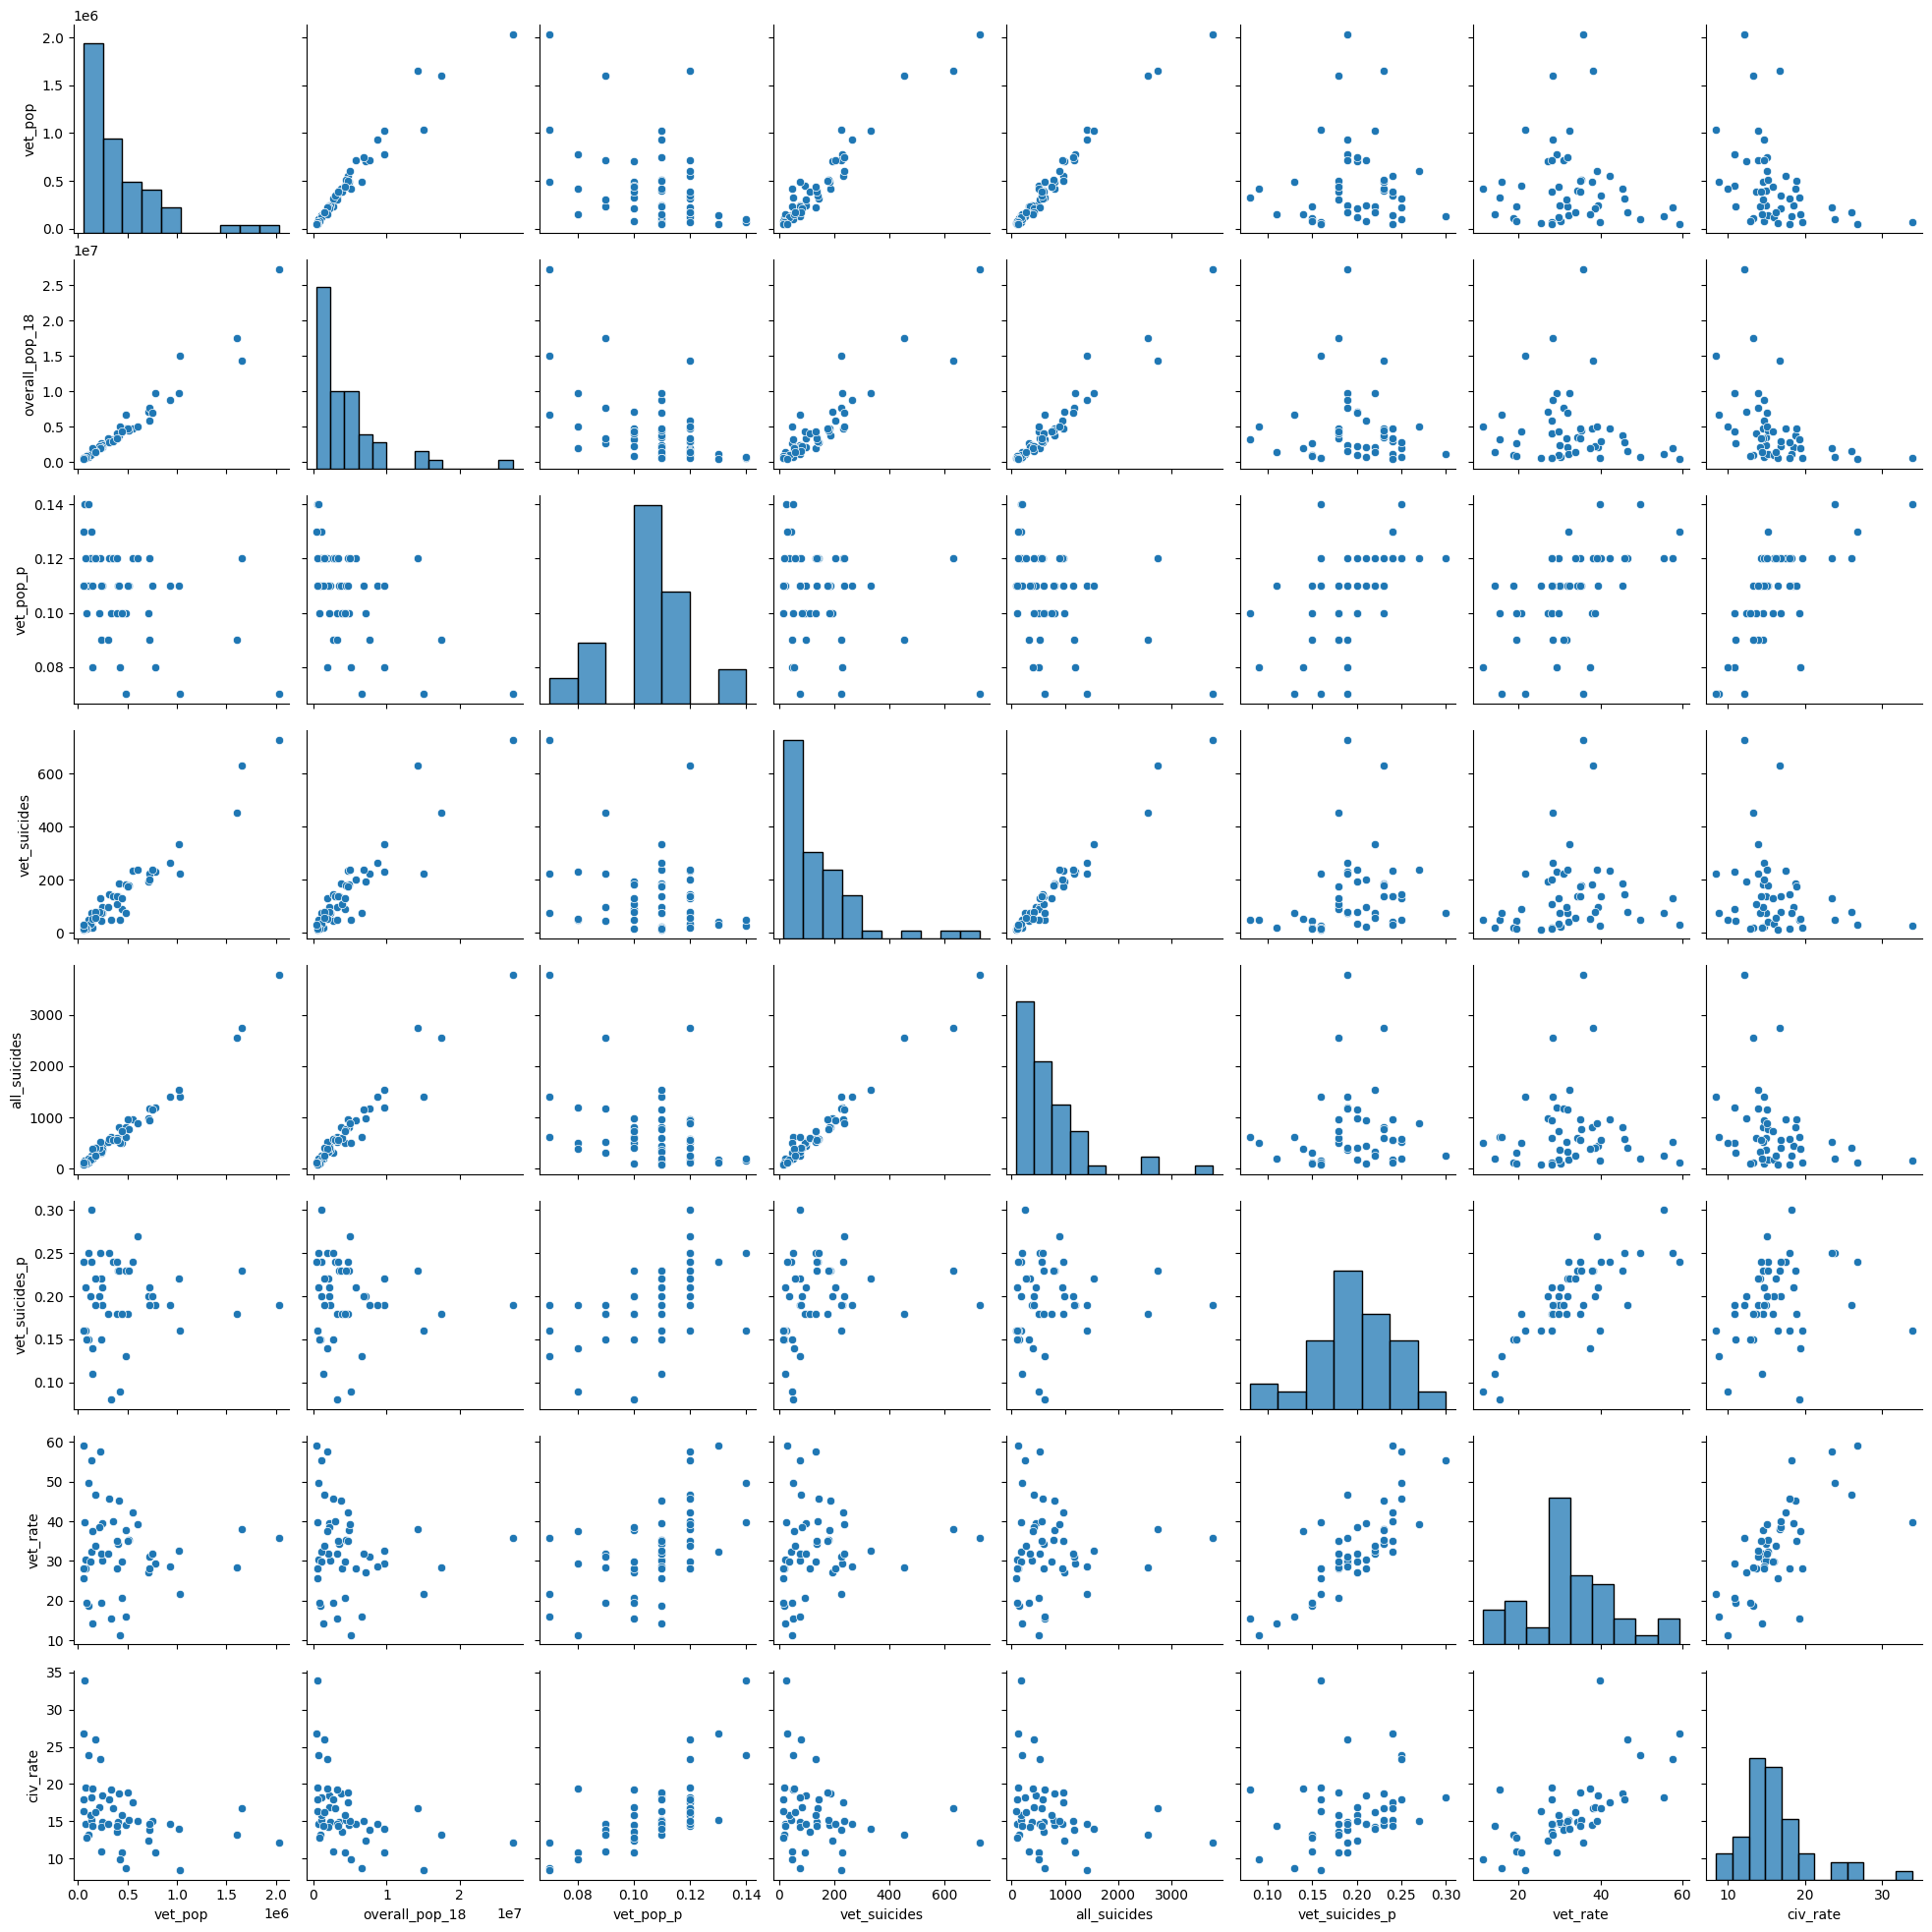

In [9]:
c2008 = pd.read_csv('initial cleaned data/c2008.csv')
c2008.drop(columns=['col1'], inplace=True)
describe8 = c2008.describe().round(2)
plot8 = sns.pairplot(c2008)
print(describe8, plot8)

          vet_pop  overall_pop_18  vet_pop_p  vet_suicides  all_suicides  \
count       50.00           50.00      50.00         50.00         50.00   
mean    436433.60      4614782.70       0.10        145.64        737.60   
std     414410.28      5074004.06       0.02        146.66        737.98   
min      51008.00       410174.00       0.07          7.00         87.00   
25%     147761.50      1365300.75       0.10         48.00        265.75   
50%     331378.00      3313338.50       0.11        100.50        554.00   
75%     525045.50      5124246.00       0.11        197.50        945.50   
max    1963556.00     27365341.00       0.14        723.00       3823.00   

       vet_suicides_p  vet_rate  civ_rate  
count           50.00     50.00     50.00  
mean             0.20     34.21     16.12  
std              0.04     10.99      4.18  
min              0.08     11.58      7.70  
25%              0.18     27.10     13.61  
50%              0.20     34.04     15.40  
75%    

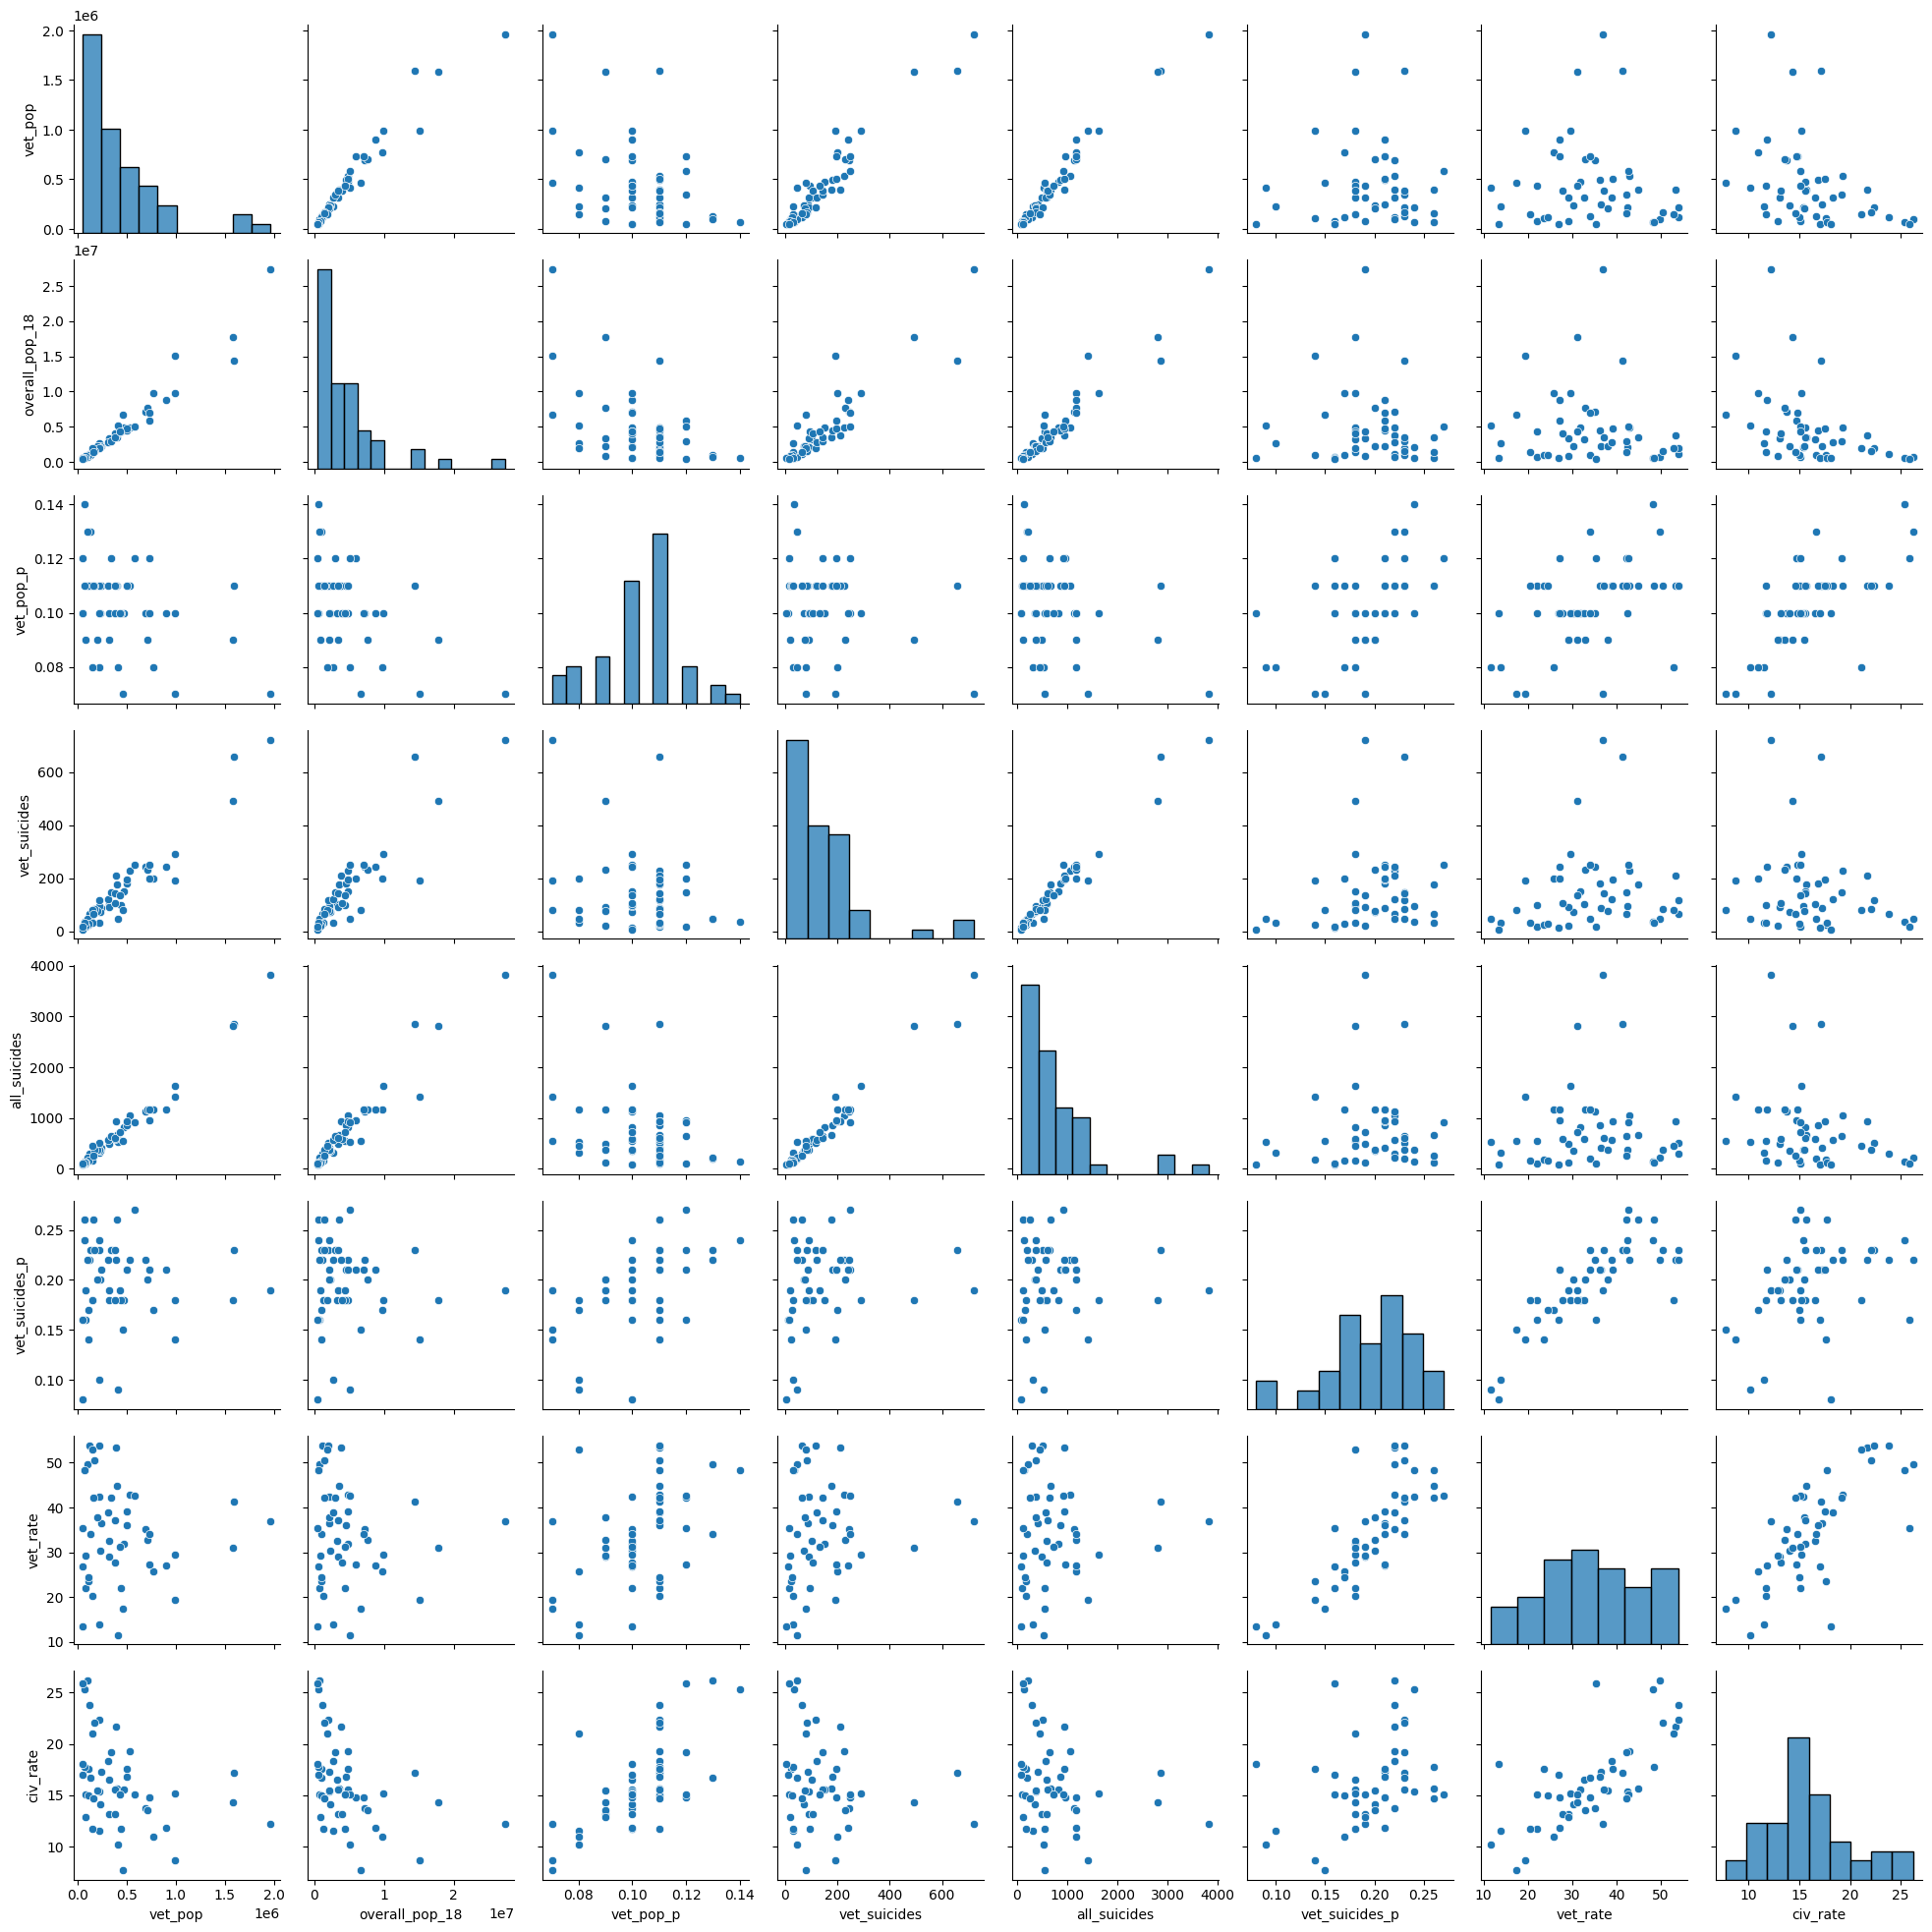

In [10]:
c2009 = pd.read_csv('initial cleaned data/c2009.csv')
c2009.drop(columns=['col1'], inplace=True)
describe9 = c2009.describe().round(2)
plot9 = sns.pairplot(c2009)
print(describe9, plot9)

          vet_pop  overall_pop_18  vet_pop_p  vet_suicides  all_suicides  \
count       50.00           50.00      50.00         50.00         50.00   
mean    435351.34      4672738.66       0.10        145.00        766.46   
std     414051.51      5159119.35       0.02        143.39        746.68   
min      48498.00       425022.00       0.06         14.00        106.00   
25%     146731.00      1390240.00       0.09         68.50        281.75   
50%     327522.50      3353205.50       0.10        104.50        602.00   
75%     521124.00      5129800.75       0.11        178.75        953.50   
max    1947570.00     27908574.00       0.14        705.00       3913.00   

       vet_suicides_p  vet_rate  civ_rate  
count           50.00     50.00     50.00  
mean             0.19     35.40     16.90  
std              0.04     11.10      4.31  
min              0.11     14.51      9.45  
25%              0.16     27.85     14.46  
50%              0.19     35.42     16.04  
75%    

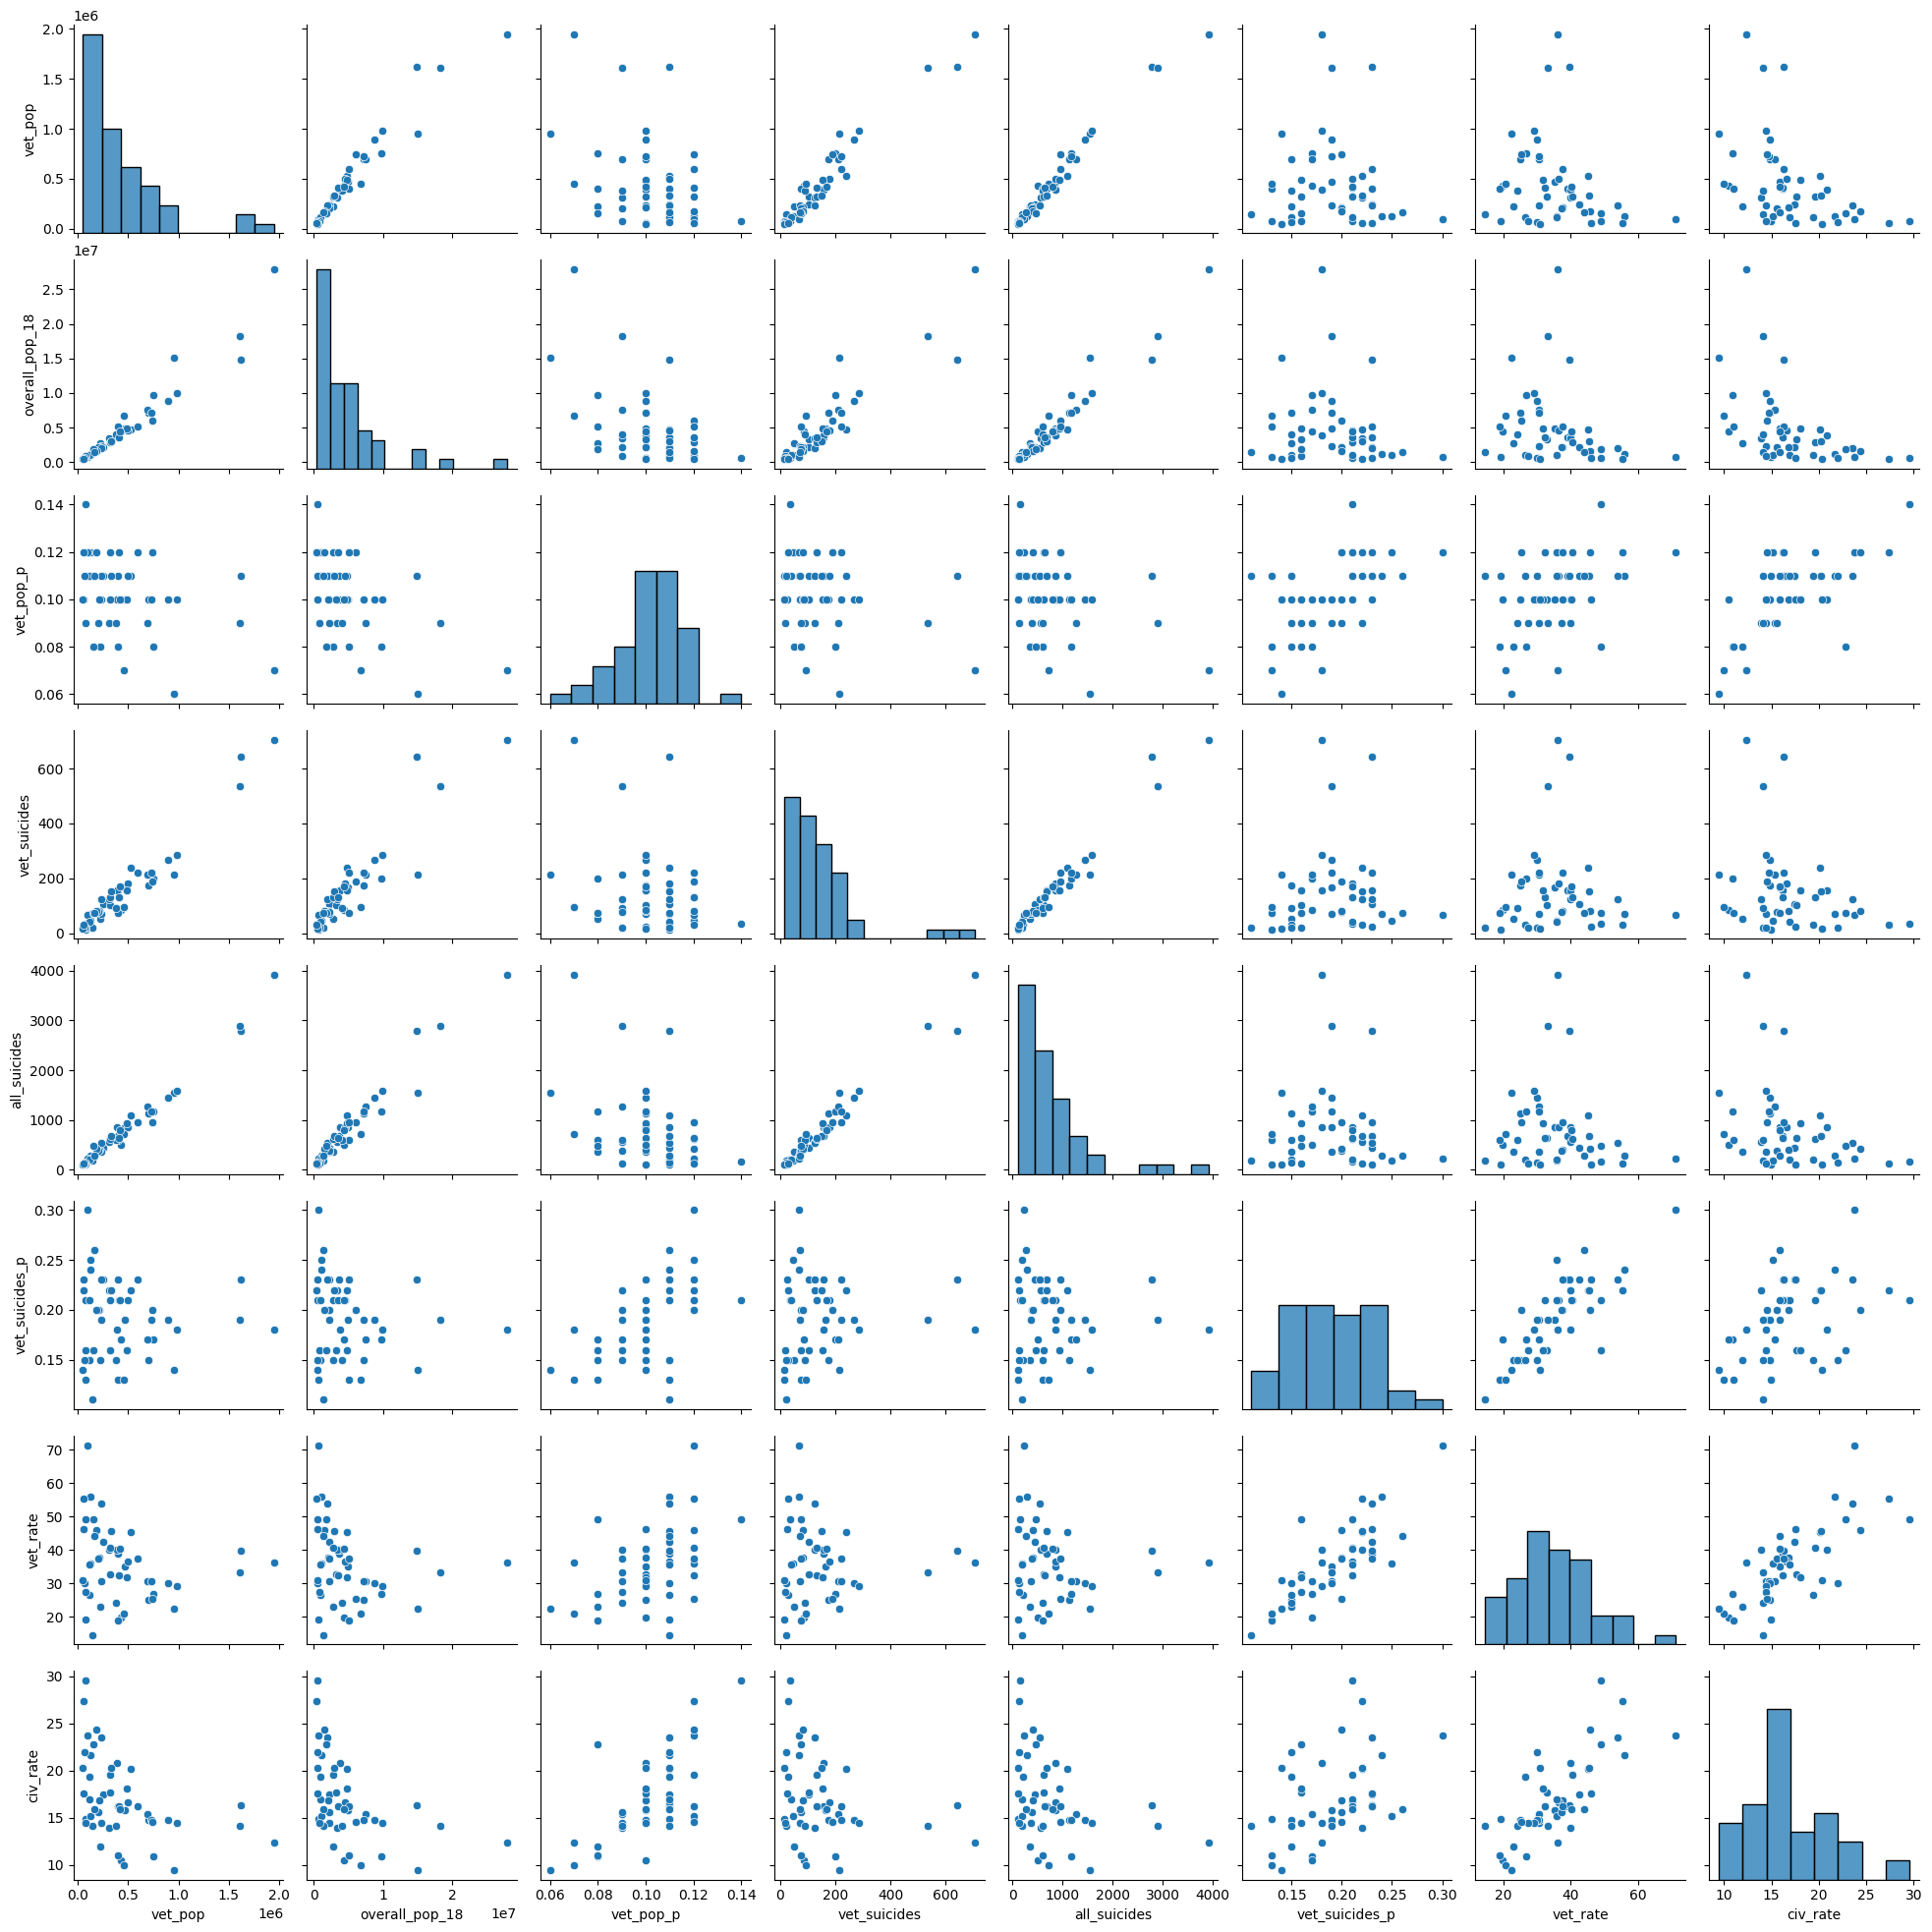

In [11]:
c2010 = pd.read_csv('initial cleaned data/c2010.csv')
c2010.drop(columns=['col1'], inplace=True)
describe10 = c2010.describe().round(2)
plot10 = sns.pairplot(c2010)
print(describe10, plot10)

          vet_pop  overall_pop_18  vet_pop_p  vet_suicides  all_suicides  \
count       50.00           50.00      50.00         50.00         50.00   
mean    428574.16      4723109.82       0.10        146.92        764.86   
std     405644.25      5228324.12       0.02        144.13        745.08   
min      51373.00       430554.00       0.06         17.00        104.00   
25%     146279.50      1400042.75       0.09         56.00        280.25   
50%     319459.00      3386285.50       0.10        109.00        611.00   
75%     522746.50      5190174.50       0.11        190.75        951.50   
max    1910994.00     28292703.00       0.14        706.00       3923.00   

       vet_suicides_p  vet_rate  civ_rate  
count           50.00     50.00     50.00  
mean             0.19     35.69     16.70  
std              0.03      9.91      4.27  
min              0.10     15.26      9.10  
25%              0.17     28.12     13.98  
50%              0.19     35.72     15.88  
75%    

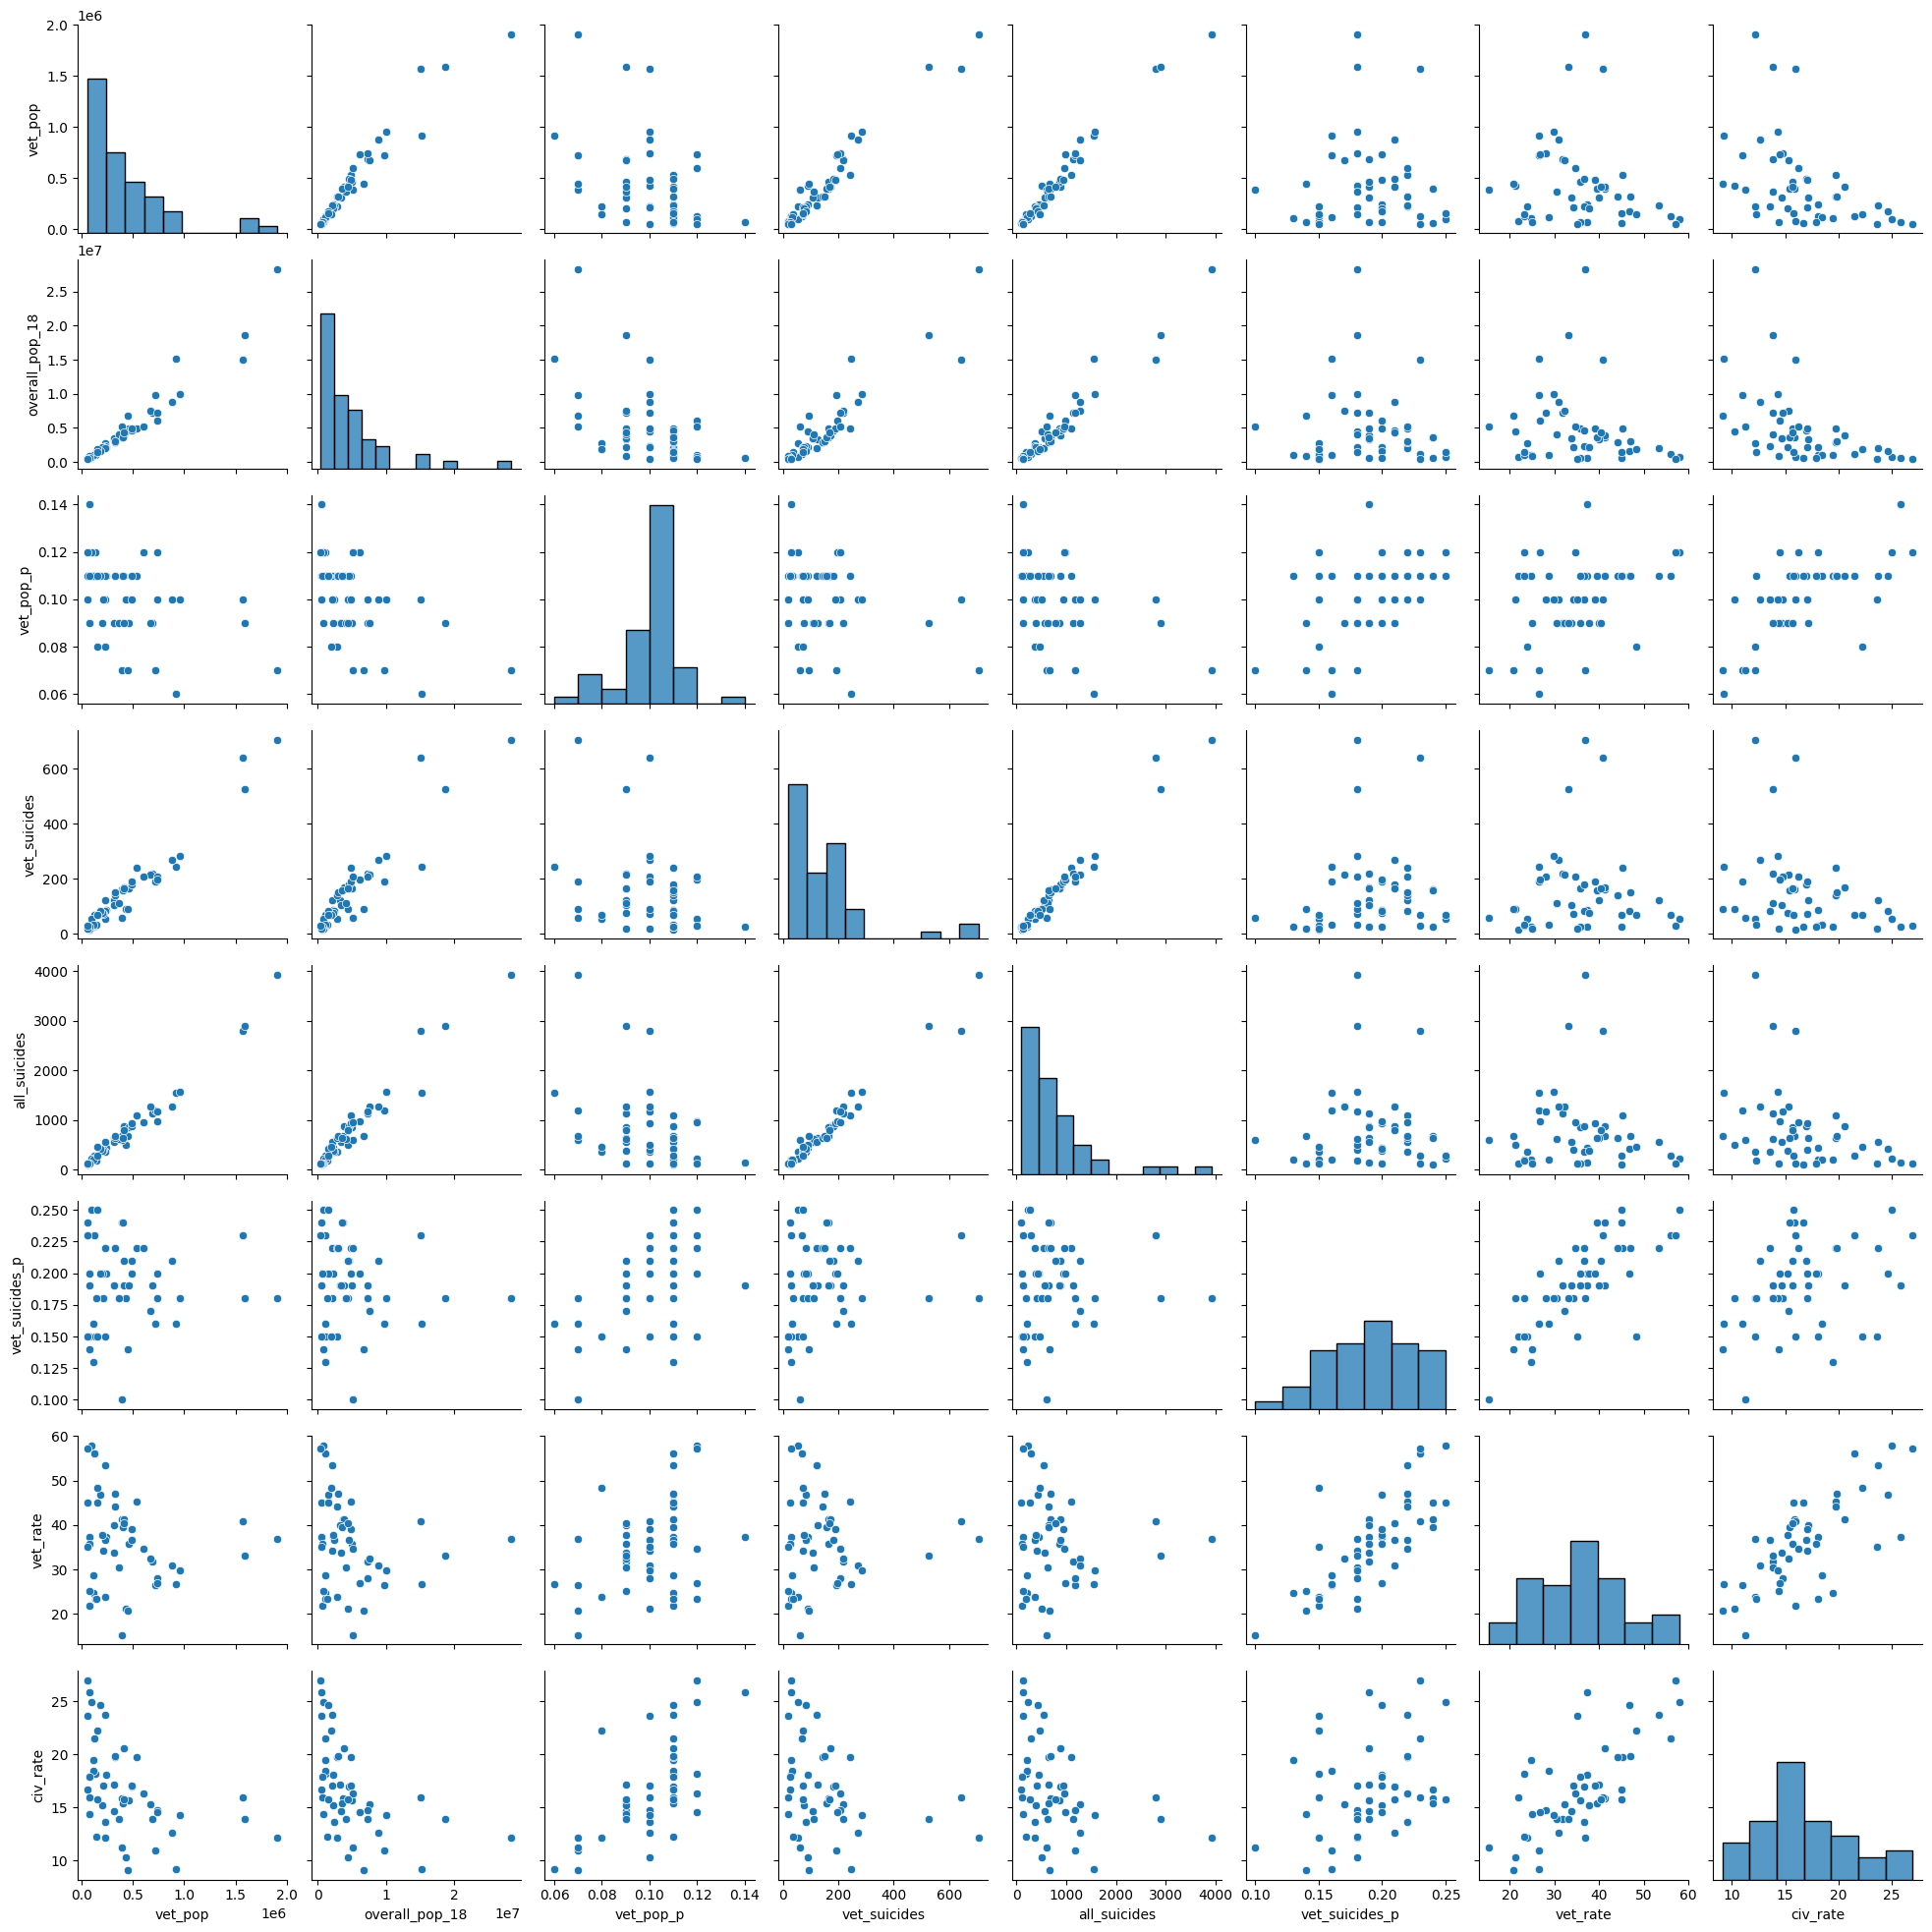

In [12]:
c2011 = pd.read_csv('initial cleaned data/c2011.csv')
c2011.drop(columns=['col1'], inplace=True)
describe11 = c2011.describe().round(2)
plot11 = sns.pairplot(c2011)
print(describe11, plot11)

In [13]:
csrav = pd.read_csv('initial cleaned data/csuicide rates among veterans.csv')
describedcsrav = csrav.describe()
print(describedcsrav)
print(csrav)

            year       rate
count    14.0000  14.000000
mean   2011.5000  22.928571
std       4.1833   3.214733
min    2005.0000  17.800000
25%    2008.2500  21.025000
50%    2011.5000  22.700000
75%    2014.7500  25.650000
max    2018.0000  27.500000
    year  rate
0   2005  18.5
1   2006  17.8
2   2007  19.1
3   2008  20.9
4   2009  21.4
5   2010  21.8
6   2011  22.6
7   2012  22.8
8   2013  24.0
9   2014  25.2
10  2015  26.3
11  2016  25.8
12  2017  27.3
13  2018  27.5


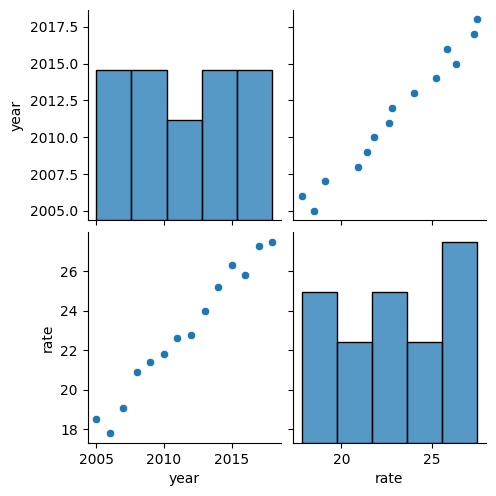

In [14]:
sns.pairplot(csrav)

### Grouped Bar Chart showing veteran suicide rates vs. civilian suicide rates

#### 2005

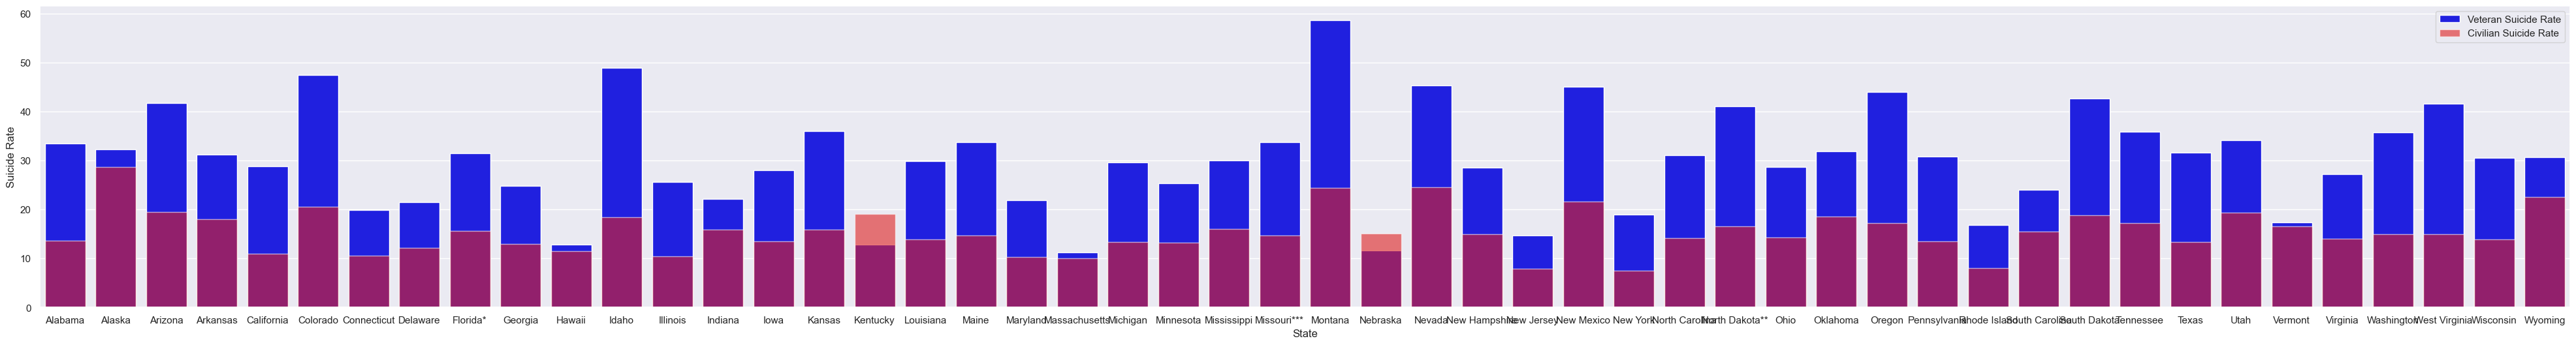

In [15]:
sns.set_theme(rc={'figure.figsize':(50,6)})
sns.barplot(x='state', y='vet_rate', data= c2005, color='blue',  label='Veteran Suicide Rate')
sns.barplot(x='state', y='civ_rate', data= c2005, color='red', label='Civilian Suicide Rate', alpha=0.6)

plt.xlabel('State')
plt.ylabel('Suicide Rate')
plt.legend()
plt.show()

#### 2006

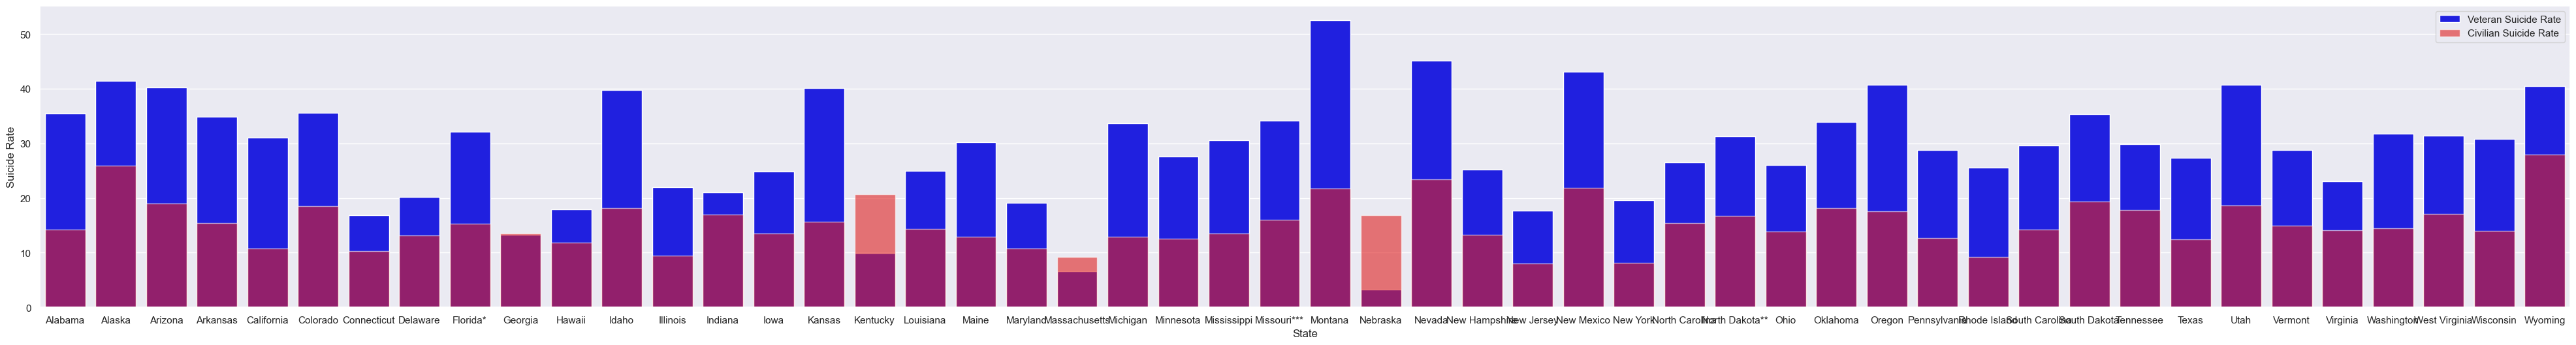

In [16]:
sns.set_theme(rc={'figure.figsize':(50,6)})
sns.barplot(x='state', y='vet_rate', data= c2006, color='blue',  label='Veteran Suicide Rate')
sns.barplot(x='state', y='civ_rate', data= c2006, color='red', label='Civilian Suicide Rate', alpha=0.6)

plt.xlabel('State')
plt.ylabel('Suicide Rate')
plt.legend()
plt.show()

#### 2007

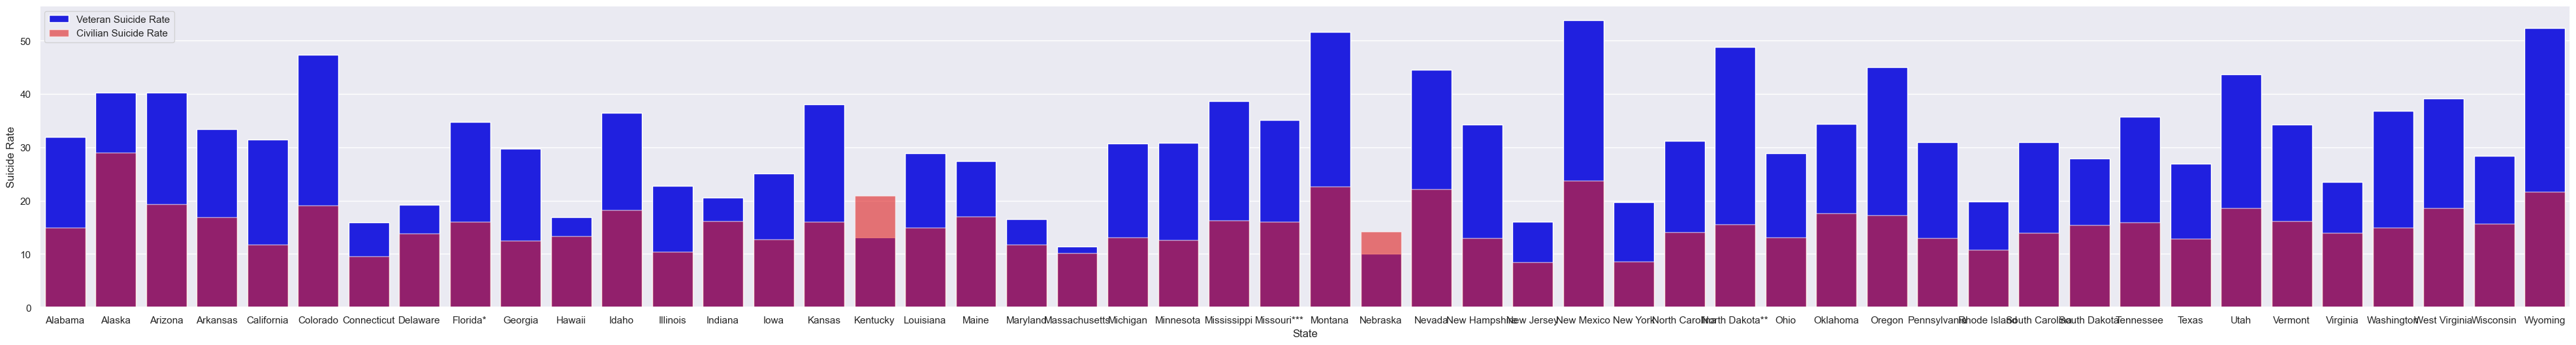

In [17]:
sns.set_theme(rc={'figure.figsize':(50,6)})
sns.barplot(x='state', y='vet_rate', data= c2007, color='blue',  label='Veteran Suicide Rate')
sns.barplot(x='state', y='civ_rate', data= c2007, color='red', label='Civilian Suicide Rate', alpha=0.6)

plt.xlabel('State')
plt.ylabel('Suicide Rate')
plt.legend()
plt.show()

#### 2008

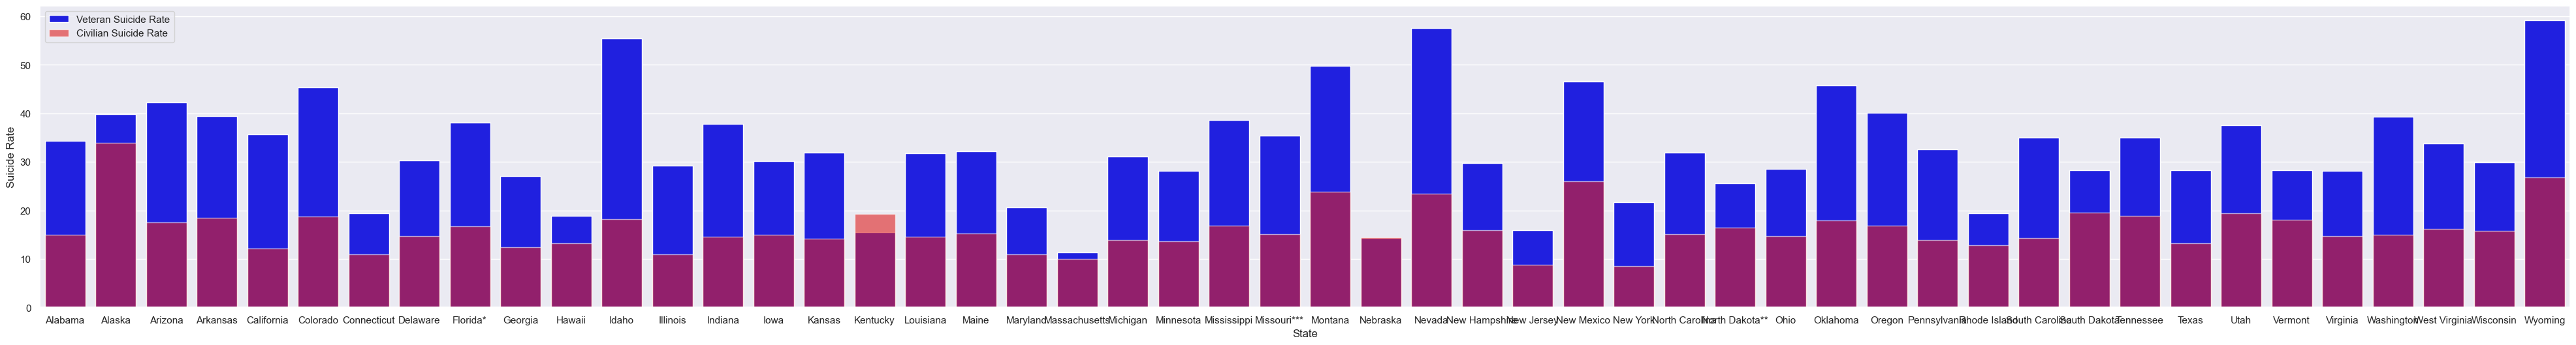

In [18]:
sns.set_theme(rc={'figure.figsize':(50,6)})
sns.barplot(x='state', y='vet_rate', data= c2008, color='blue',  label='Veteran Suicide Rate')
sns.barplot(x='state', y='civ_rate', data= c2008, color='red', label='Civilian Suicide Rate', alpha=0.6)

plt.xlabel('State')
plt.ylabel('Suicide Rate')
plt.legend()
plt.show()

#### 2009

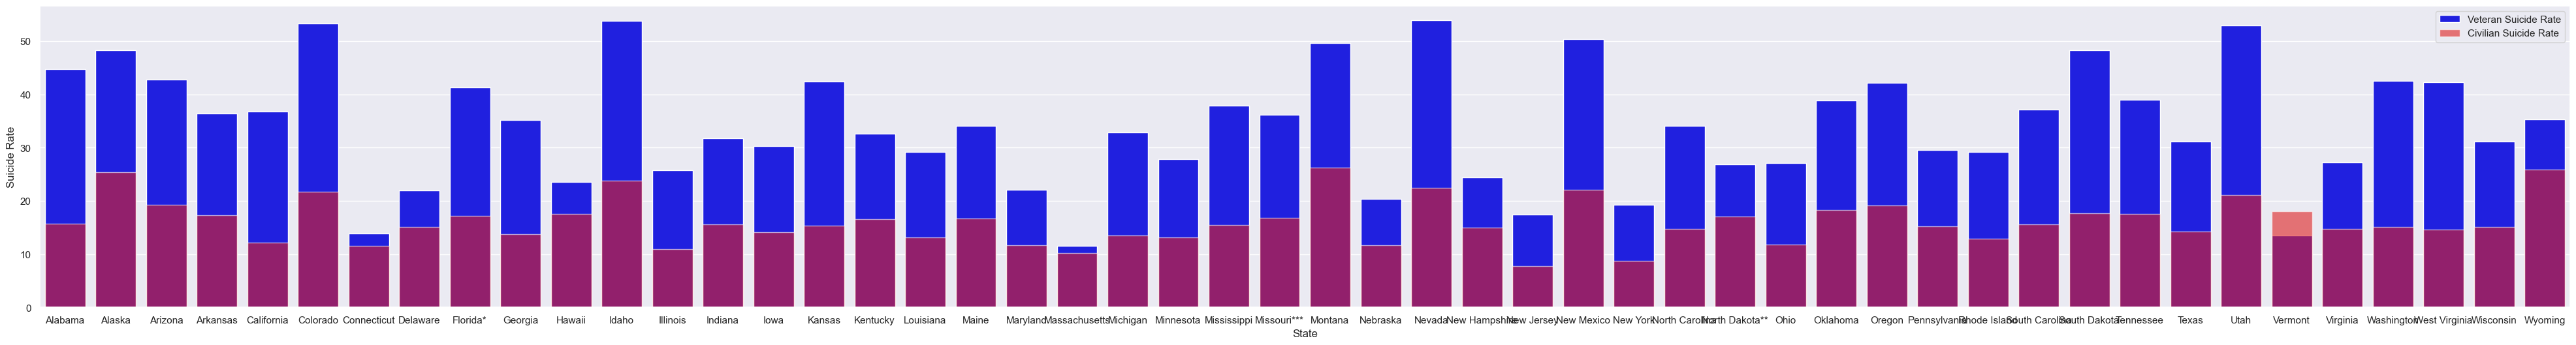

In [19]:
sns.set_theme(rc={'figure.figsize':(50,6)})
sns.barplot(x='state', y='vet_rate', data= c2009, color='blue',  label='Veteran Suicide Rate')
sns.barplot(x='state', y='civ_rate', data= c2009, color='red', label='Civilian Suicide Rate', alpha=0.6)

plt.xlabel('State')
plt.ylabel('Suicide Rate')
plt.legend()
plt.show()

#### 2010

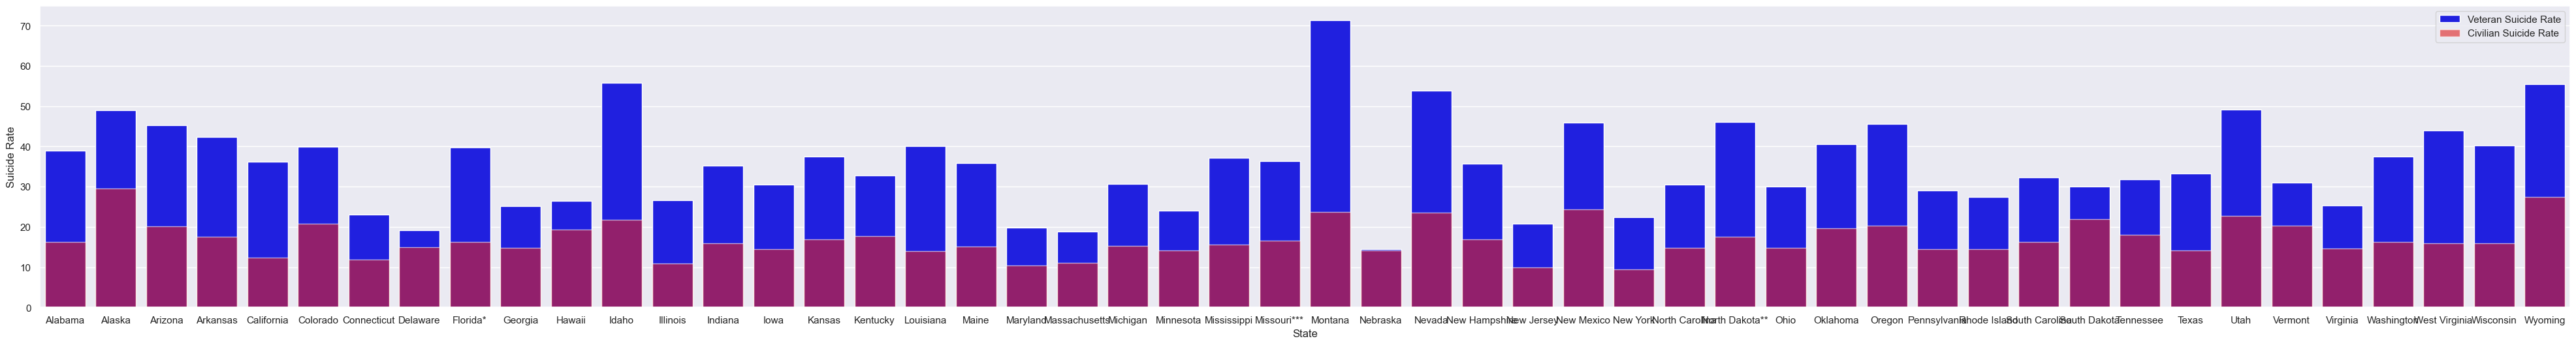

In [20]:
sns.set_theme(rc={'figure.figsize':(50,6)})
sns.barplot(x='state', y='vet_rate', data= c2010, color='blue',  label='Veteran Suicide Rate')
sns.barplot(x='state', y='civ_rate', data= c2010, color='red', label='Civilian Suicide Rate', alpha=0.6)

plt.xlabel('State')
plt.ylabel('Suicide Rate')
plt.legend()
plt.show()

#### 2011

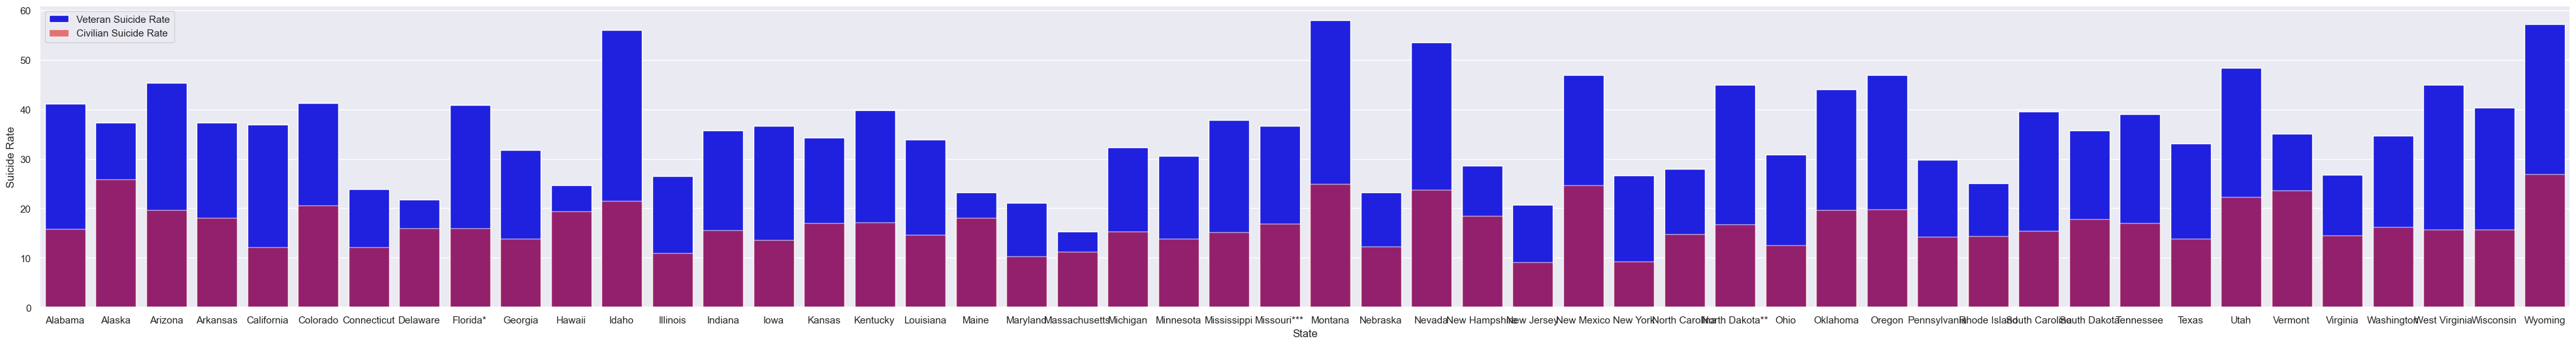

In [21]:
sns.set_theme(rc={'figure.figsize':(50,6)})
sns.barplot(x='state', y='vet_rate', data= c2011, color='blue',  label='Veteran Suicide Rate')
sns.barplot(x='state', y='civ_rate', data= c2011, color='red', label='Civilian Suicide Rate', alpha=0.6)

plt.xlabel('State')
plt.ylabel('Suicide Rate')
plt.legend()
plt.show()

#### Suicide rates among veterans

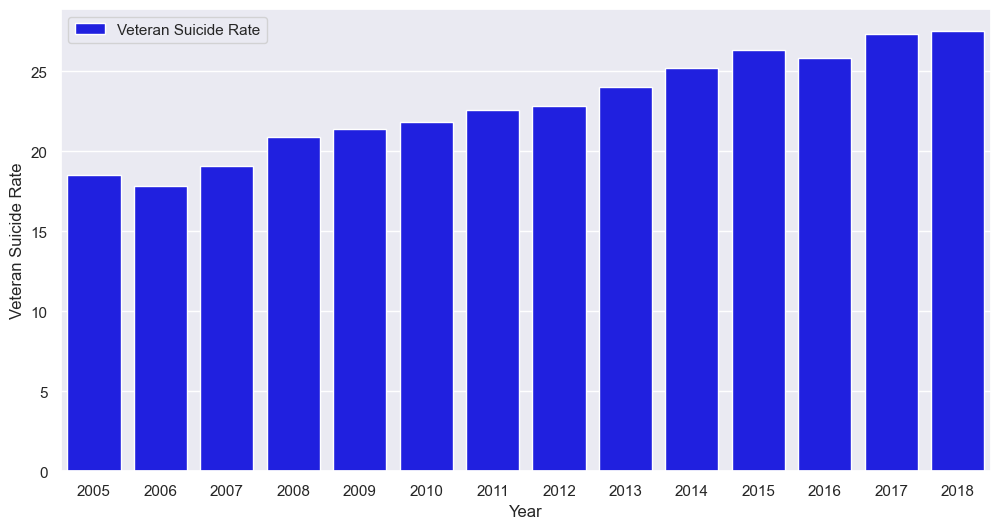

In [22]:
sns.set_theme(rc={'figure.figsize':(12,6)})
sns.barplot(x='year', y='rate', data= csrav, color='blue',  label='Veteran Suicide Rate')


plt.xlabel('Year')
plt.ylabel('Veteran Suicide Rate')
plt.legend()
plt.show()

### Creating an averages file
Below we are finding the average number of veteran suicides from each final cleaned csv file and creating one compiled file of averages to be used in the linear regression model.

In [23]:
df5 = pd.read_csv('final cleaned data/new2005.csv')
averages5 = df5['vet_suicides'].mean()

In [24]:
df6 = pd.read_csv('final cleaned data/new2006.csv')
averages6 = df6['vet_suicides'].mean()

In [25]:
df7 = pd.read_csv('final cleaned data/new2007.csv')
averages7 = df7['vet_suicides'].mean()

In [26]:
df8 = pd.read_csv('final cleaned data/new2008.csv')
averages8 = df8['vet_suicides'].mean()

In [27]:
df9 = pd.read_csv('final cleaned data/new2009.csv')
averages9 = df9['vet_suicides'].mean()

In [28]:
df10 = pd.read_csv('final cleaned data/new2010.csv')
averages10 = df10['vet_suicides'].mean()

In [29]:
df11 = pd.read_csv('final cleaned data/new2011.csv')
averages11 = df11['vet_suicides'].mean()

In [30]:
averagesdf = pd.DataFrame({'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011], 
                           'average veteran suicides': [averages5, averages6, averages7, averages8, averages9, averages10, averages11]})
averagesdf.to_csv('averages.csv', index=False)

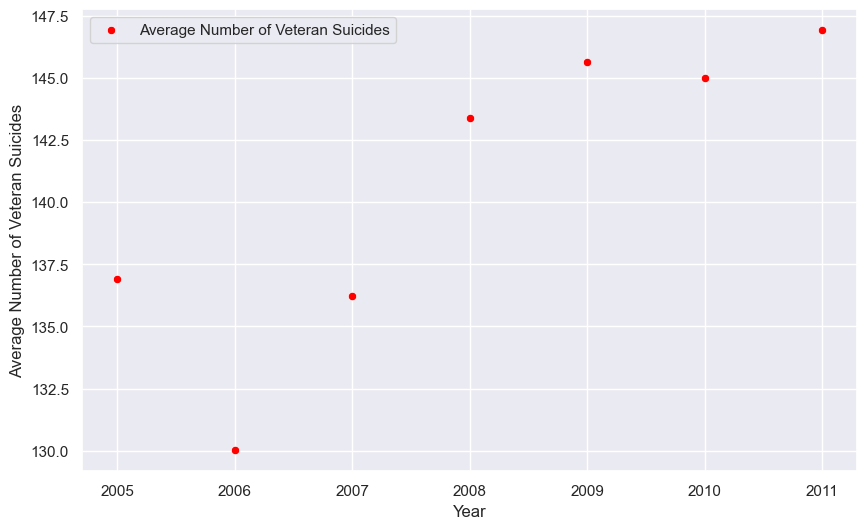

In [31]:
sns.set_theme(rc={'figure.figsize':(10,6)})
sns.scatterplot(x='year', y='average veteran suicides', data= averagesdf , color='red',  label='Average Number of Veteran Suicides')


plt.xlabel('Year')
plt.ylabel('Average Number of Veteran Suicides')
plt.legend()
plt.show()

#### Creating a combined data file.
This file will show the average rates of veteran suicides.

In [42]:
df05 = pd.read_csv('initial cleaned data/c2005.csv')
rates5 = df05['vet_rate'].mean()


In [34]:
df06 = pd.read_csv('initial cleaned data/c2006.csv')
rates6 = df06['vet_rate'].mean()

In [35]:
df07 = pd.read_csv('initial cleaned data/c2007.csv')
rates7 = df07['vet_rate'].mean()

In [36]:
df08 = pd.read_csv('initial cleaned data/c2008.csv')
rates8 = df08['vet_rate'].mean()

In [37]:
df09 = pd.read_csv('initial cleaned data/c2009.csv')
rates9 = df09['vet_rate'].mean()

In [38]:
df10 = pd.read_csv('initial cleaned data/c2010.csv')
rates10 = df10['vet_rate'].mean()

In [39]:
df11 = pd.read_csv('initial cleaned data/c2011.csv')
rates11 = df11['vet_rate'].mean()

In [44]:
ratesdf = pd.DataFrame({'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, ], 'rates of veteran suicides': [rates5, rates6, rates7, rates8, rates9, rates10, rates11]})
ratesdff = ratesdf.round(2)
ratesdff.to_csv('rates.csv', index=False)
